In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

plt.style.use('ggplot')
# plots of BT only work with this following command
%matplotlib inline

## Retorno dos Ativos

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:>

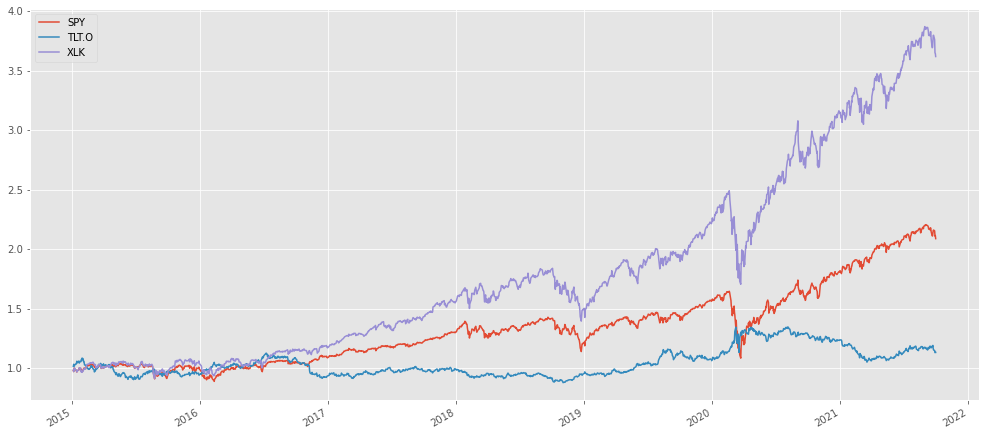

In [103]:
import os
DATA_PATH = os.path.join('..', 'silver', 'daily_feature_set.csv')
NAME_SUFFIX = "daily_v2"
ASSETS = ['SPY', 'TLT.O', 'XLK']
START_OUT_SAMPLE = '2015-01-05'
END_OUT_SAMPLE = '2021-09-30'

#=======================================================| TRAIN

data = pd.read_csv(DATA_PATH, parse_dates=True, index_col=0)
data = data.loc[(~data['TLT.O_logReturns'].isnull()) | (~data['TAIL.K_logReturns'].isnull())]
data.fillna(0, inplace=True)

start_out_samp = pd.Timestamp(START_OUT_SAMPLE)
end_out_samp = pd.Timestamp(END_OUT_SAMPLE)

df_out_sample = data.loc[start_out_samp:end_out_samp, :]


df_out_sample.loc[:,'XLK_cumsum'] = df_out_sample[['XLK_logReturns']].cumsum()
df_out_sample.loc[:, 'XLK'] = df_out_sample['XLK_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'SPY_cumsum'] = df_out_sample[['SPY_logReturns']].cumsum()
df_out_sample.loc[:, 'SPY'] = df_out_sample['SPY_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'TLT.O_cumsum'] = df_out_sample[['TLT.O_logReturns']].cumsum()
df_out_sample.loc[:, 'TLT.O'] = df_out_sample['TLT.O_cumsum'].apply(np.exp)

df_out_sample[['SPY', 'TLT.O', 'XLK']].plot(figsize=(17, 8))

<AxesSubplot:>

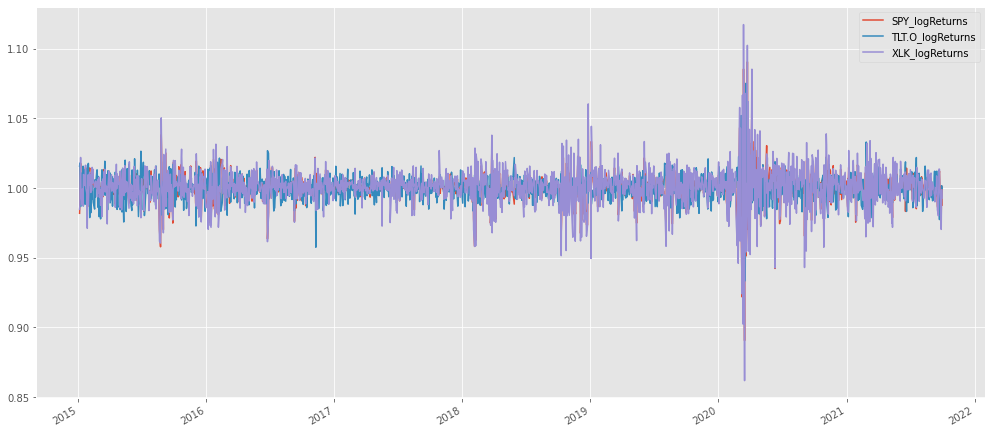

In [108]:
df_out_sample[['SPY_logReturns', 'TLT.O_logReturns', 'XLK_logReturns']].apply(np.exp).plot(figsize=(17, 8))

## DPG

Pontos de destaque:
 - Quanto menor o learning rate, mais propenso a alocar os pesos igualmente o modelo está
 - Quanto maior o learning_rate, mais propenso a alocar em um ativo apenas o modelo fica. Em geral, tende a alocar ao ativo de maior retorno, que no caso é XLK

<AxesSubplot:xlabel='date'>

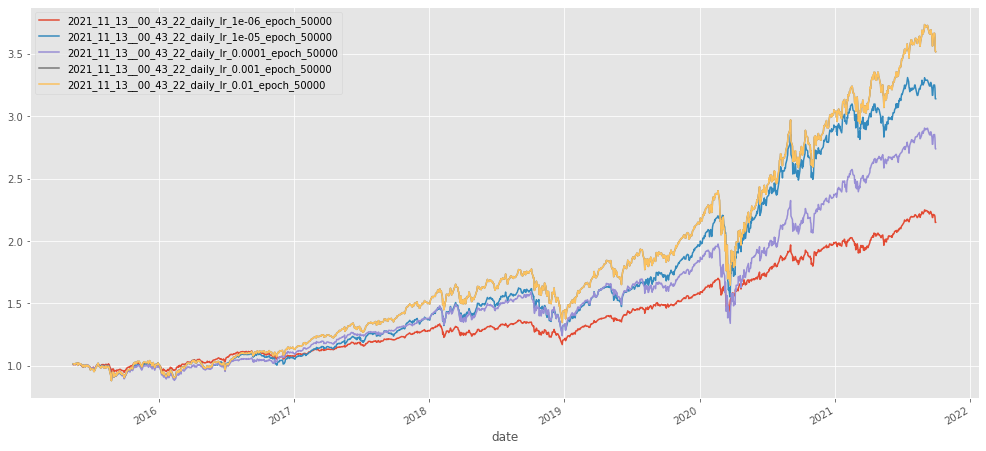

In [67]:
df_result_back = pd.read_csv('../results/backtest/2021_11_13__05_11_46_aggregated_dpg_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [68]:
df_result_back.columns

Index(['2021_11_13__00_43_22_daily_lr_1e-06_epoch_50000',
       '2021_11_13__00_43_22_daily_lr_1e-05_epoch_50000',
       '2021_11_13__00_43_22_daily_lr_0.0001_epoch_50000',
       '2021_11_13__00_43_22_daily_lr_0.001_epoch_50000',
       '2021_11_13__00_43_22_daily_lr_0.01_epoch_50000'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

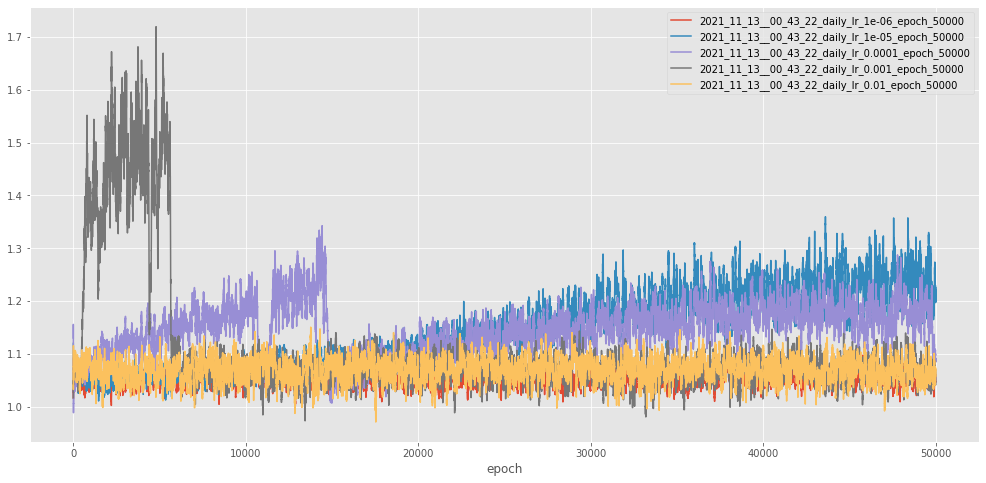

In [69]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_13__05_11_45_aggregated_dpg_v2.csv', index_col=0).rolling(50, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

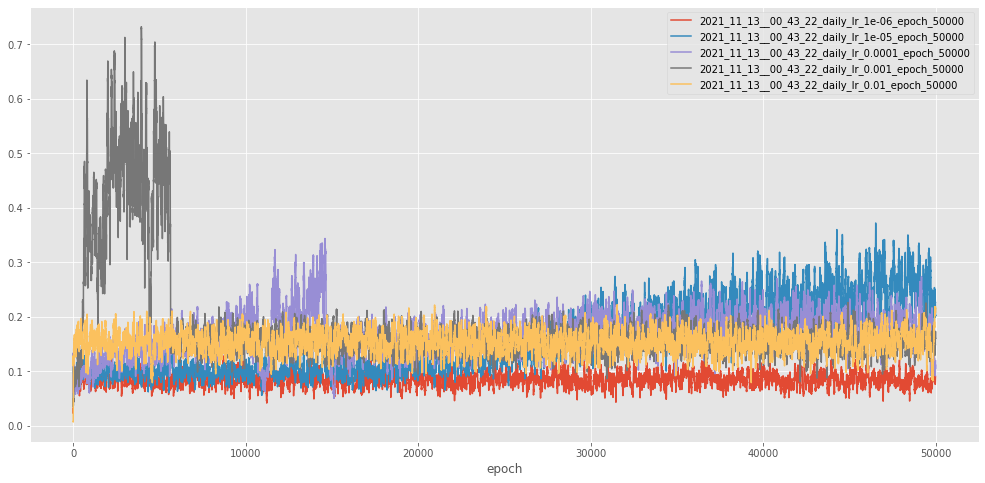

In [70]:
df_result_train1_std = pd.read_csv('../results/portfolio_values/2021_11_13__05_11_45_aggregated_dpg_v2.csv', index_col=0).rolling(50, min_periods=1).std()
df_result_train1_std.plot(figsize=(17,8))

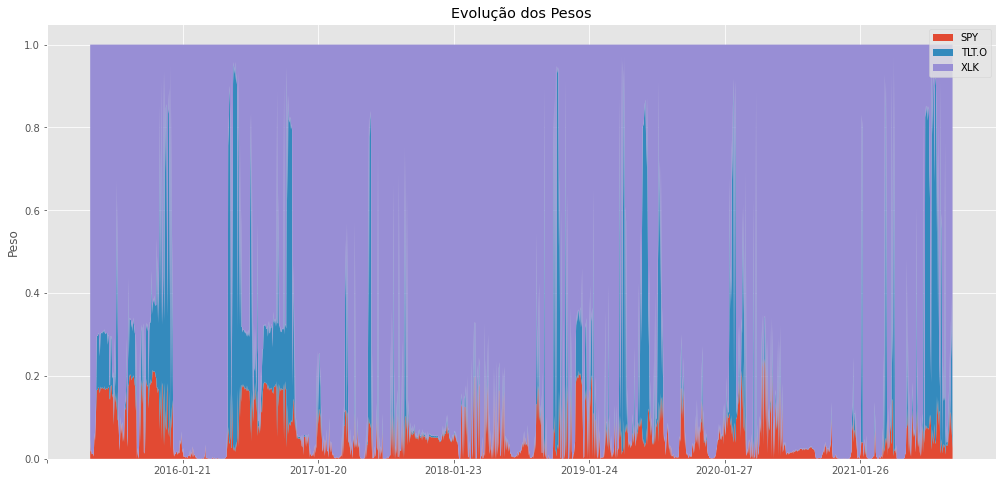

In [4]:
df_w = pd.read_csv('../results/weights/2021_11_13__00_43_22_daily_lr_1e-05_epoch_50000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
plt.show()

#### Treino sem BatchNorm nas camadas de convolução

<AxesSubplot:xlabel='date'>

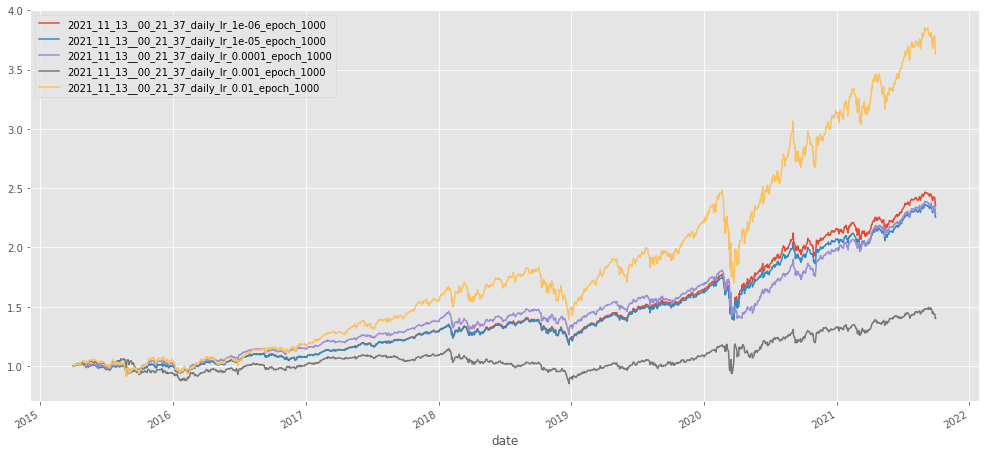

In [54]:
df_result_back = pd.read_csv('../results/backtest/2021_11_13__00_24_44_aggregated_dpg_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [55]:
df_result_back.columns

Index(['2021_11_13__00_21_37_daily_lr_1e-06_epoch_1000',
       '2021_11_13__00_21_37_daily_lr_1e-05_epoch_1000',
       '2021_11_13__00_21_37_daily_lr_0.0001_epoch_1000',
       '2021_11_13__00_21_37_daily_lr_0.001_epoch_1000',
       '2021_11_13__00_21_37_daily_lr_0.01_epoch_1000'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

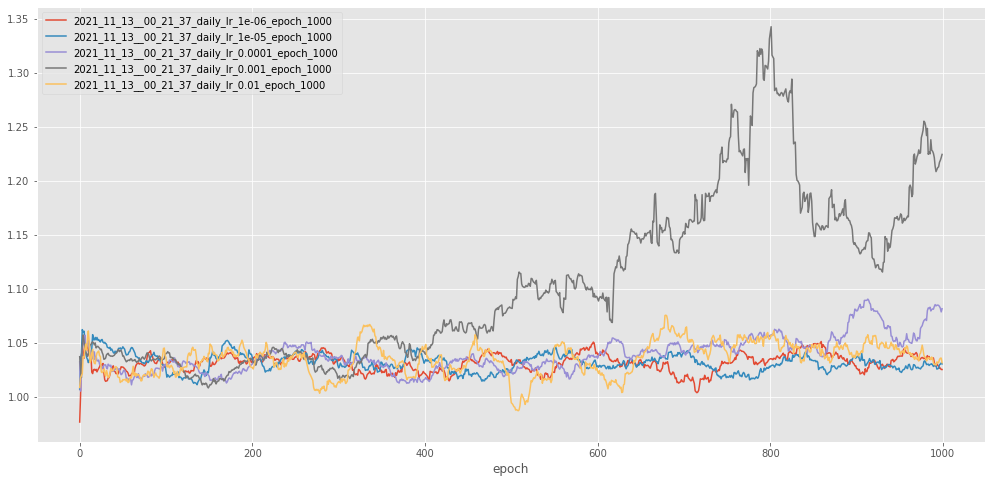

In [56]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_13__00_24_43_aggregated_dpg_v2.csv', index_col=0).rolling(50, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

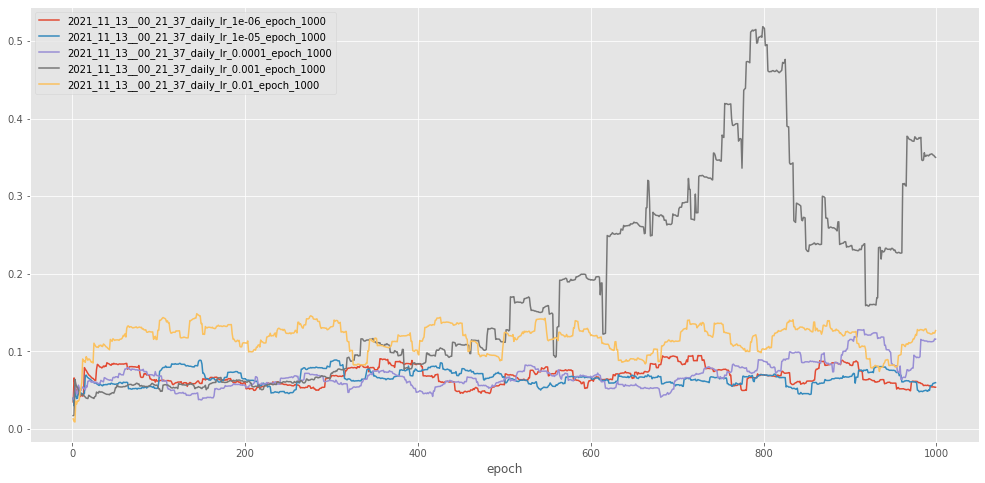

In [57]:
df_result_train1_std = pd.read_csv('../results/portfolio_values/2021_11_13__00_24_43_aggregated_dpg_v2.csv', index_col=0).rolling(50, min_periods=1).std()
df_result_train1_std.plot(figsize=(17,8))

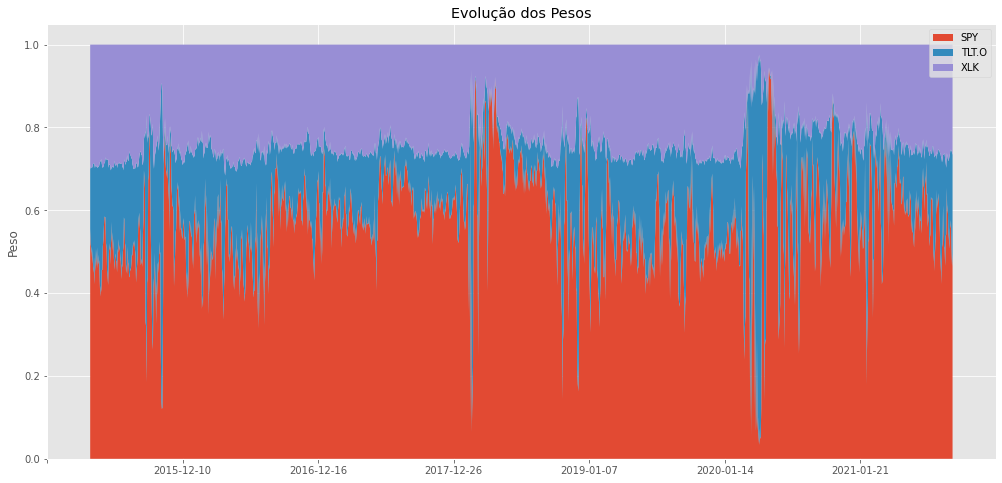

In [117]:
df_w = pd.read_csv('../results/weights/2021_11_13__00_21_37_daily_lr_0.0001_epoch_1000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
plt.show()

#### Treino com dropout

Inserir o dropout ajudou o modelo a conseguir investirmelhor no ativo de proteção quando houveram os períodos de crise. A hipótese é que, usando o retorno do portfólio do objetivo de otimização, é isso que o modelo vai tentar fazer, e por isso tende a investir mais no ativo de maior retorno. Porém, ao inserirmos dropout, tornamos o modelo _menos complexo_, e portanto prejudicamos a sua capacidade de aprender bem o retorno total dos ativos. Assim, ele percebe uma tendência em um retorno maior por parte do XLK, mas acaba tendo espaço para aprender um objetivo "mais imediato", onde vê que o ativo de proteção possui uma correlação negativa com o XLK, e com isso, nos momentos de crise, vale a pena chavear para ele.

<AxesSubplot:xlabel='date'>

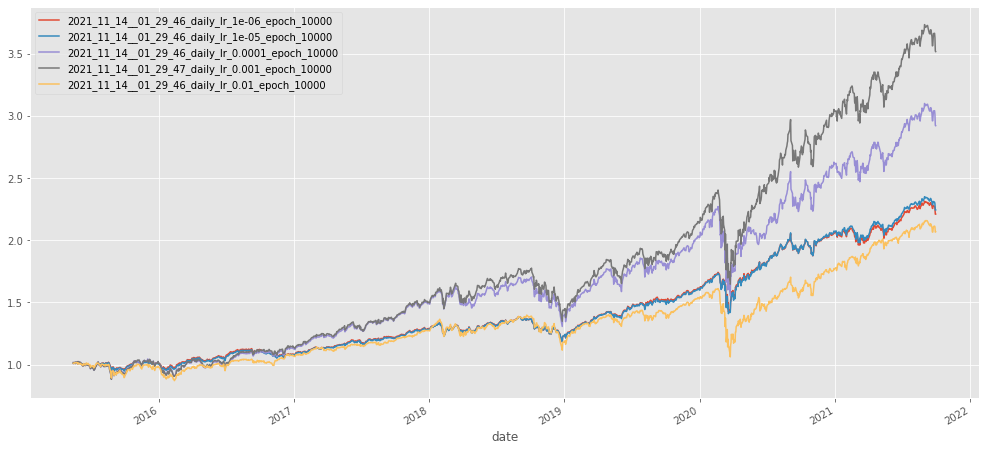

In [74]:
df_result_back = pd.read_csv('../results/backtest/2021_11_14__02_28_22_aggregated_dpg_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [75]:
df_result_back.columns

Index(['2021_11_14__01_29_46_daily_lr_1e-06_epoch_10000',
       '2021_11_14__01_29_46_daily_lr_1e-05_epoch_10000',
       '2021_11_14__01_29_46_daily_lr_0.0001_epoch_10000',
       '2021_11_14__01_29_47_daily_lr_0.001_epoch_10000',
       '2021_11_14__01_29_46_daily_lr_0.01_epoch_10000'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

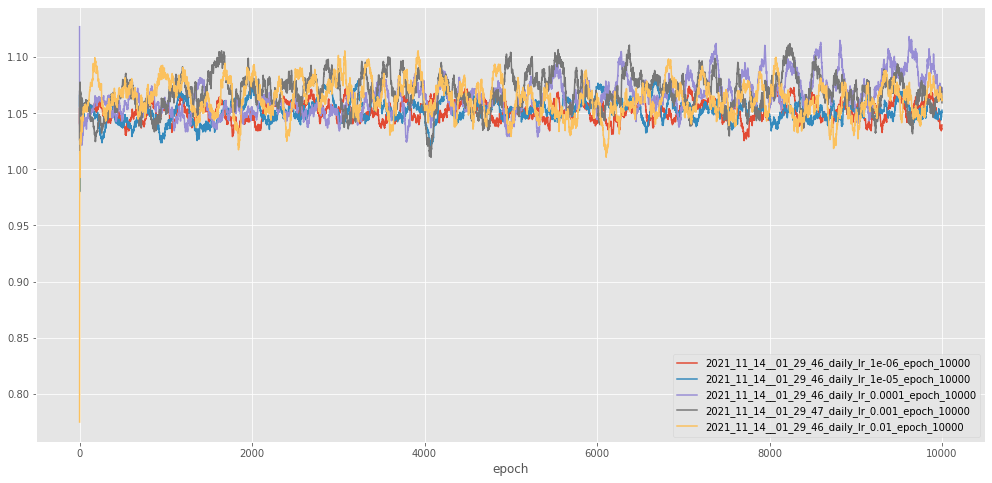

In [78]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_14__02_28_22_aggregated_dpg_v2.csv', index_col=0).rolling(100, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

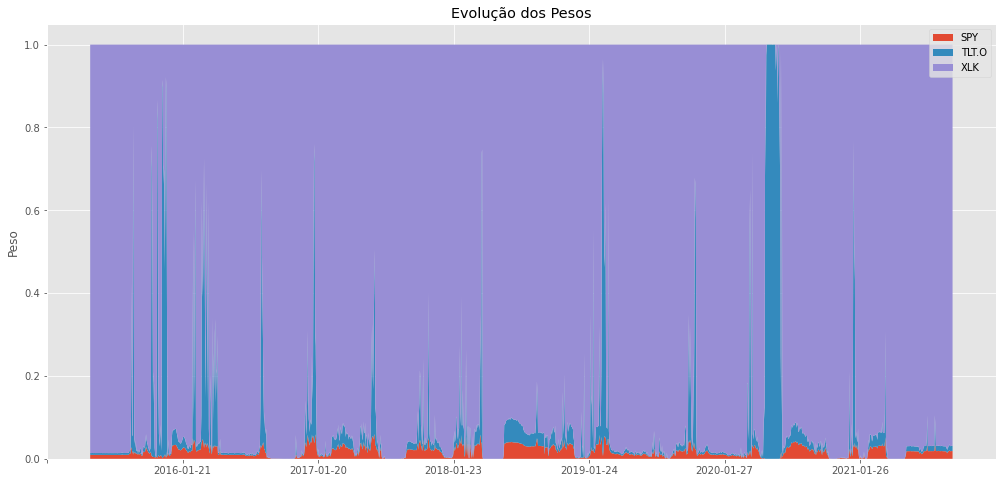

In [8]:
df_w = pd.read_csv('../results/weights/2021_11_14__01_29_46_daily_lr_0.0001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
plt.show()

#### Usando Sharpe Ratio como objetivo

Quando usamos uma medida de risco, como sharpe, vemos  que o modelo apresenta uma tendência a tentar chavear para o ativo de proteção durante os períodos de crise. Mas também percebemos que, ao contrário do que vinha ocorrendo, quanto maior o learning rate, maior a tendência a alocar o peso no ativo com uma variância menor, no caso o de proteção. E mesmo para valores de lr que vinham performando bem, ele apresenta uma maior tendência de alocar os pesos igualmente, procurando diminuir a variância observada. 

Essa abordagem dá um caminho interessante, uma vez que utilizar métricas que levam em conta o risco parece ser uma boa solução. Apesar disso, pelo fato do sharpe considerar toda e qualquer variância prejudicial, inclusive quando ela é positiva, ele pode penalizar demais ativos que apresentam um bom crescimento. Assim, talvez métricas que foquem mais em minimizar _quedas_ de retorno, como o **sortino ratio** podem ser opções boas de serem utilizadas.

<AxesSubplot:xlabel='date'>

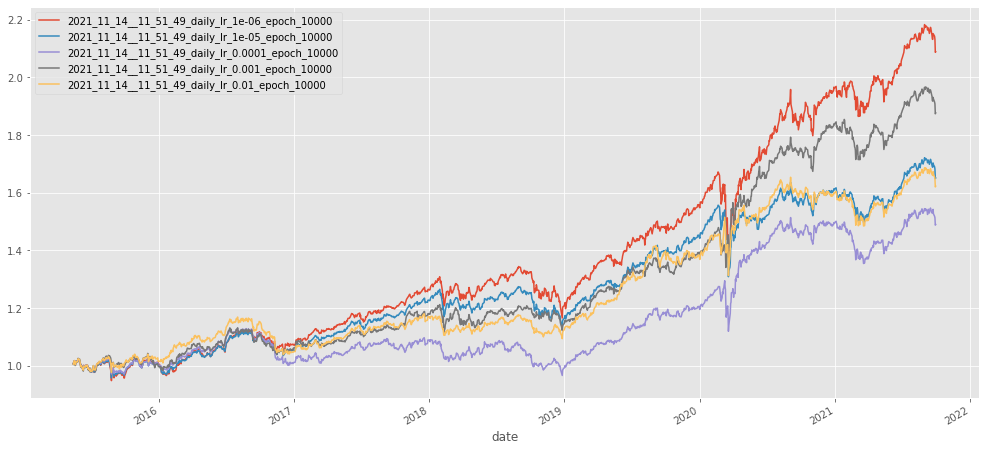

In [9]:
df_result_back = pd.read_csv('../results/backtest/2021_11_14__12_45_03_aggregated_dpg_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [10]:
df_result_back.columns

Index(['2021_11_14__11_51_49_daily_lr_1e-06_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_1e-05_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.0001_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.001_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.01_epoch_10000'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

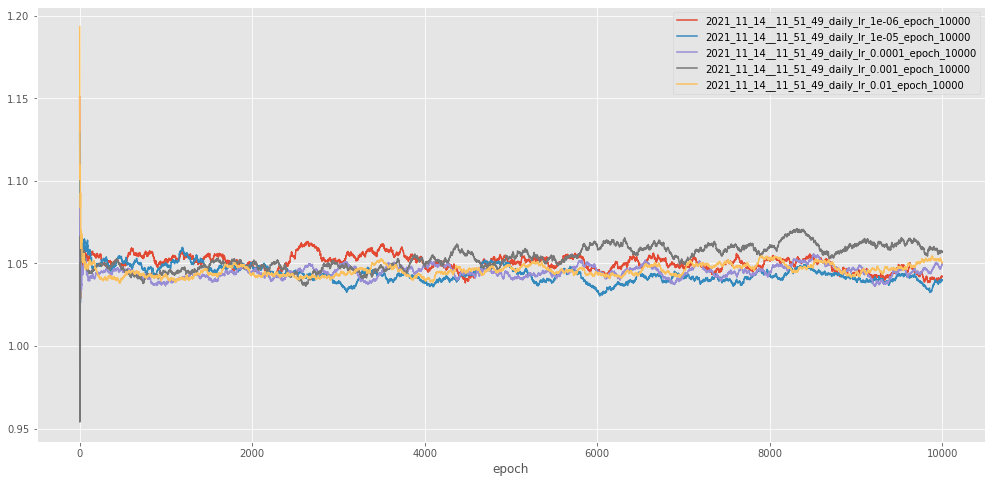

In [87]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_14__12_45_03_aggregated_dpg_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

In [88]:
df_result_back.columns

Index(['2021_11_14__11_51_49_daily_lr_1e-06_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_1e-05_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.0001_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.001_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.01_epoch_10000'],
      dtype='object')

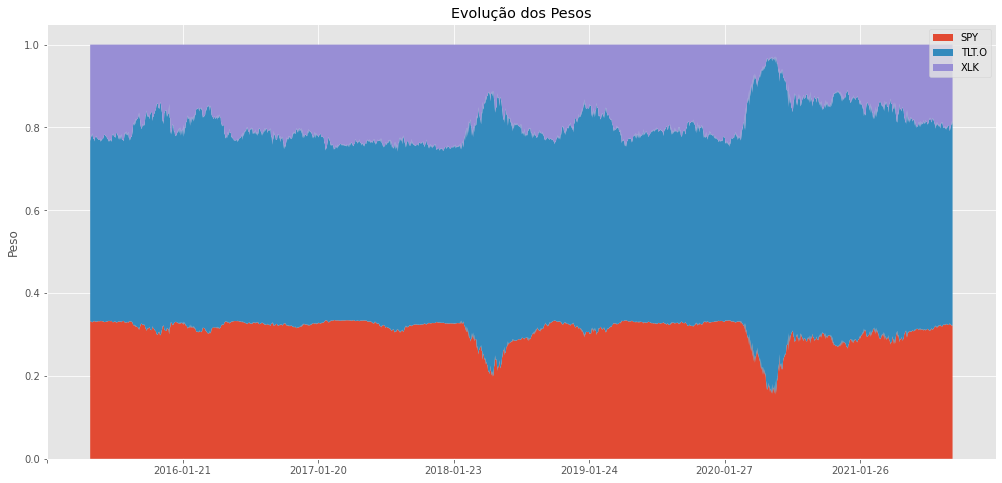

In [16]:
df_w = pd.read_csv('../results/weights/2021_11_14__11_51_49_daily_lr_1e-05_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

In [114]:
start

-80.30000000000001

<AxesSubplot:>

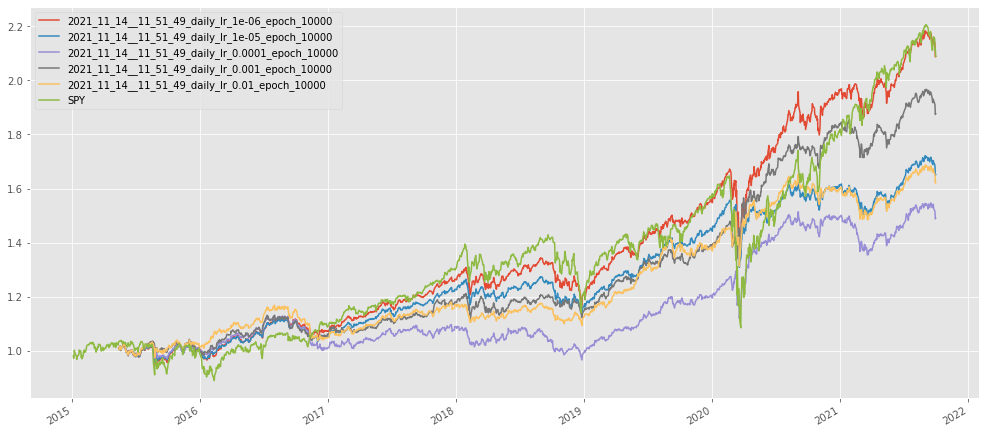

In [96]:
df_all = pd.concat(
    [
        df_result_back, 
        df_out_sample[['SPY']]
    ], axis=1
)
df_all.plot(figsize=(17,8))

#### Treino usando dados semanais, e com o valor do portfólio como objetivo

<AxesSubplot:xlabel='date'>

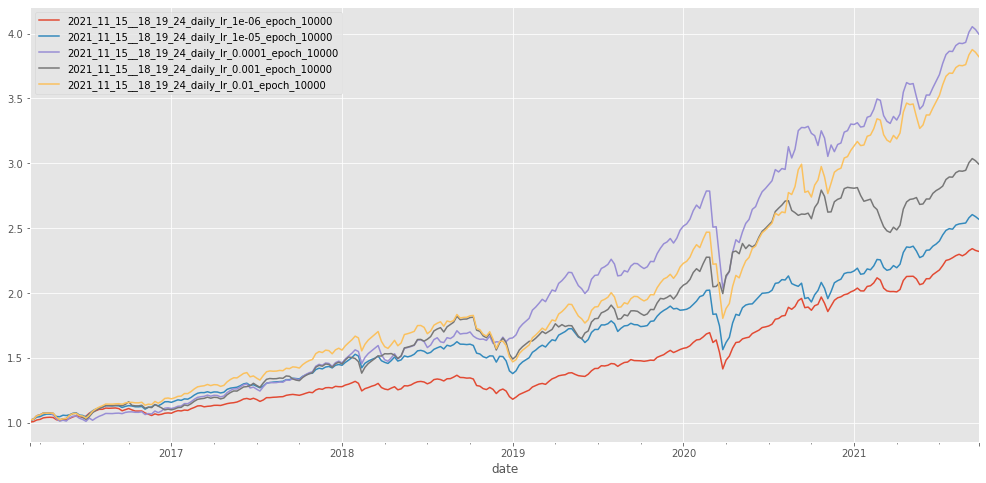

In [119]:
df_result_back = pd.read_csv('../results/backtest/2021_11_15__19_14_08_aggregated_dpg_week.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

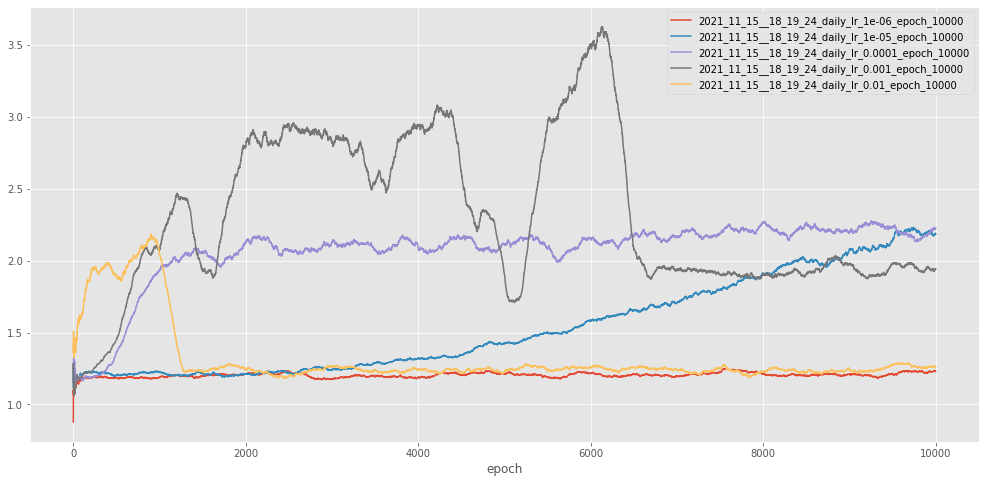

In [122]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_15__19_14_07_aggregated_dpg_week.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

In [123]:
df_result_back.columns

Index(['2021_11_15__18_19_24_daily_lr_1e-06_epoch_10000',
       '2021_11_15__18_19_24_daily_lr_1e-05_epoch_10000',
       '2021_11_15__18_19_24_daily_lr_0.0001_epoch_10000',
       '2021_11_15__18_19_24_daily_lr_0.001_epoch_10000',
       '2021_11_15__18_19_24_daily_lr_0.01_epoch_10000'],
      dtype='object')

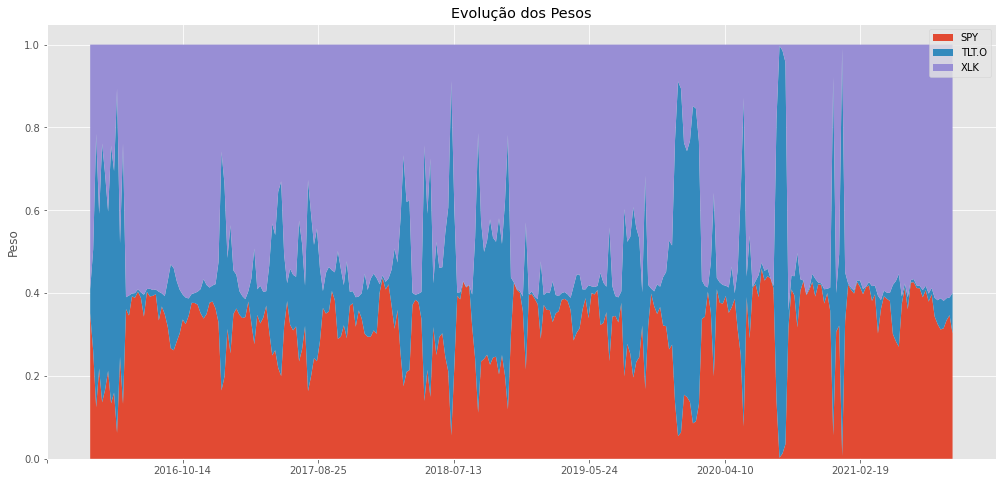

In [128]:
df_w = pd.read_csv('../results/weights/2021_11_15__18_19_24_daily_lr_1e-05_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

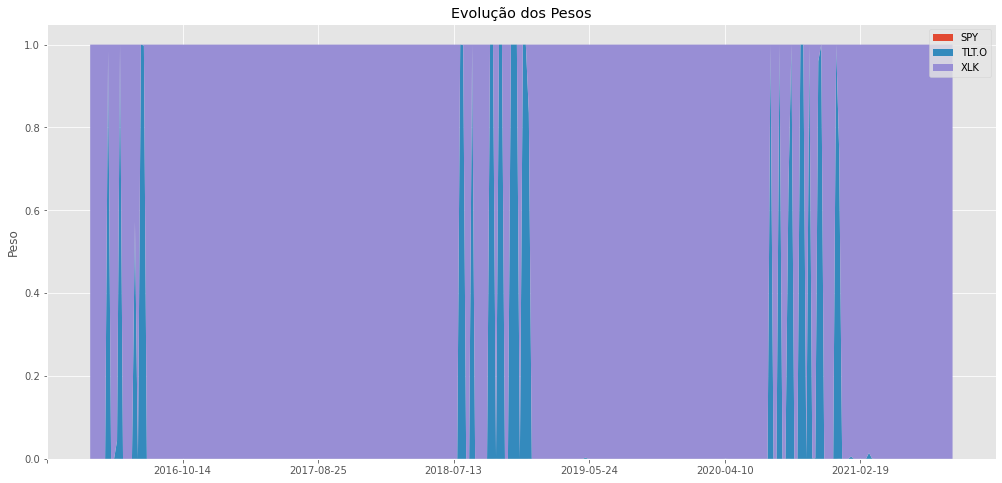

In [129]:

df_w = pd.read_csv('../results/weights/2021_11_15__18_19_24_daily_lr_0.0001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

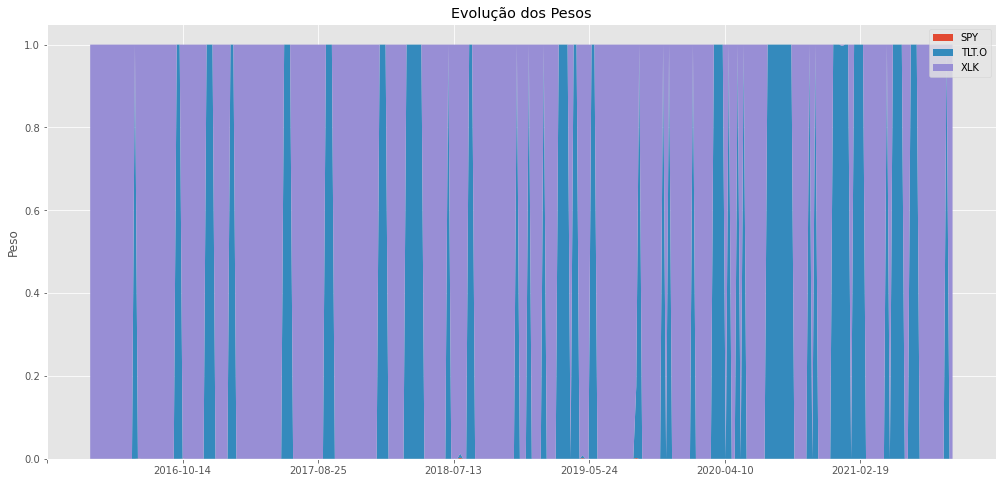

In [130]:
df_w = pd.read_csv('../results/weights/2021_11_15__18_19_24_daily_lr_0.001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

#### Treino com dados diários e filtros maiores 

Ainda utilizando retorno total do portfólio como métrica de otimização.

<AxesSubplot:xlabel='date'>

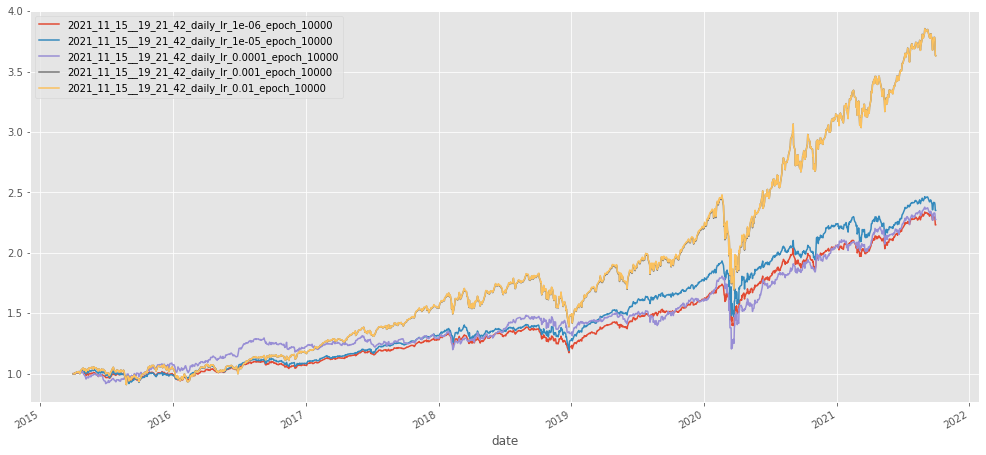

In [131]:
df_result_back = pd.read_csv('../results/backtest/2021_11_15__20_16_26_aggregated_dpg_daily_new_cnn.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [132]:
df_result_back.columns

Index(['2021_11_15__19_21_42_daily_lr_1e-06_epoch_10000',
       '2021_11_15__19_21_42_daily_lr_1e-05_epoch_10000',
       '2021_11_15__19_21_42_daily_lr_0.0001_epoch_10000',
       '2021_11_15__19_21_42_daily_lr_0.001_epoch_10000',
       '2021_11_15__19_21_42_daily_lr_0.01_epoch_10000'],
      dtype='object')

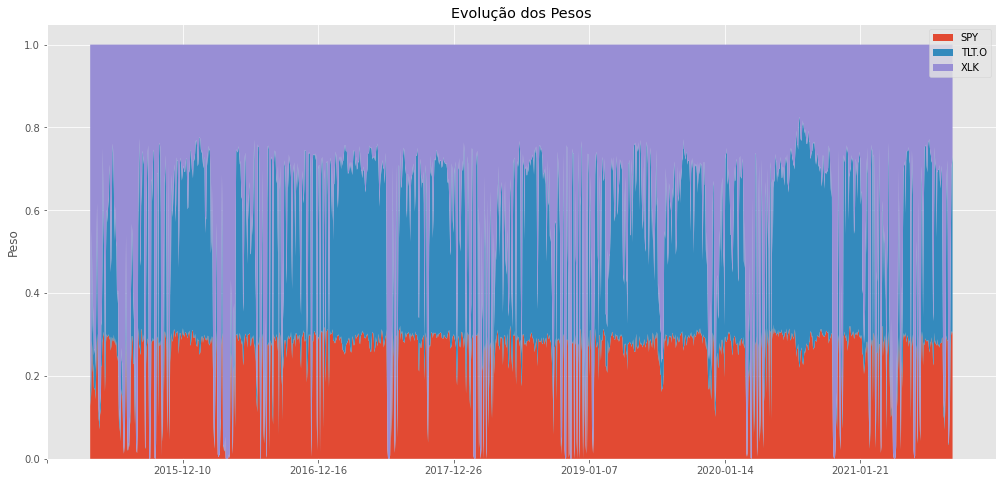

In [10]:
df_w = pd.read_csv('../results/weights/2021_11_15__19_21_42_daily_lr_1e-05_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

#### Treino usando LSTM

As features foram construídas como no treinamento simples anterior, mas dessa vez o modelo do ator contava com um LSTM para aprender temporalidade, com 20 unidades

<AxesSubplot:xlabel='date'>

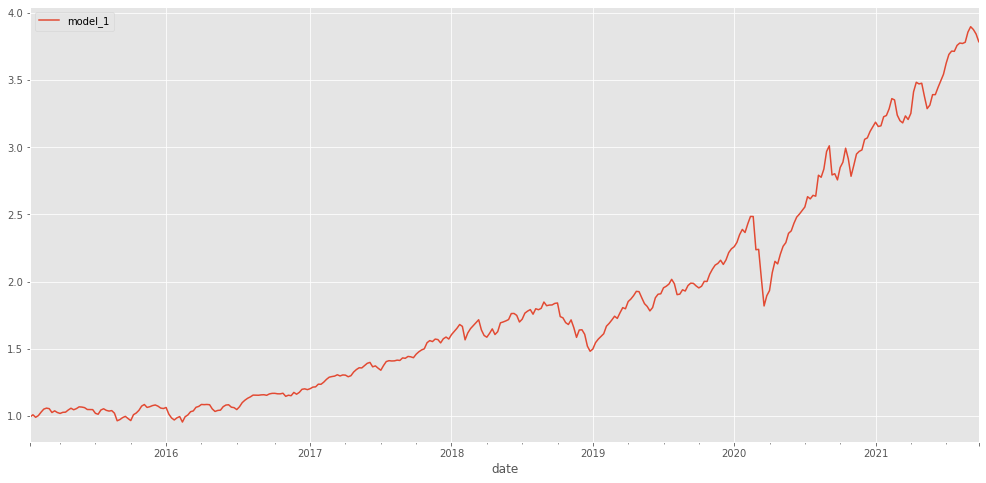

In [93]:
df_result_back = pd.read_csv('../results/backtest/2021_11_15__00_26_40_dpg_ltsm_lr_0.0001_epoch_50000.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

<AxesSubplot:>

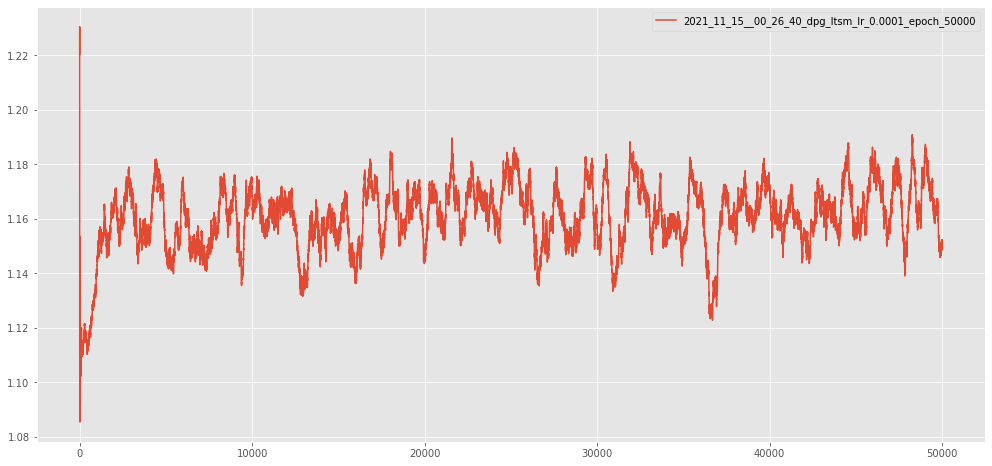

In [100]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_15__00_26_40_dpg_ltsm_lr_0.0001_epoch_50000.csv').rolling(500, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

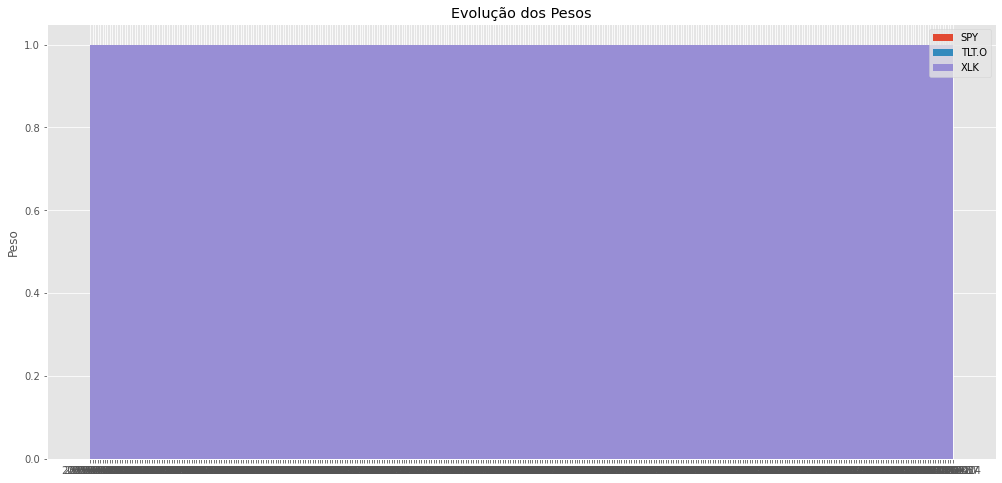

In [94]:
df_w = pd.read_csv('../results/weights/2021_11_15__00_26_40_dpg_ltsm_lr_0.0001_epoch_50000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
plt.show()

#### Testando LSTM com Sharpe como métrica

<AxesSubplot:xlabel='date'>

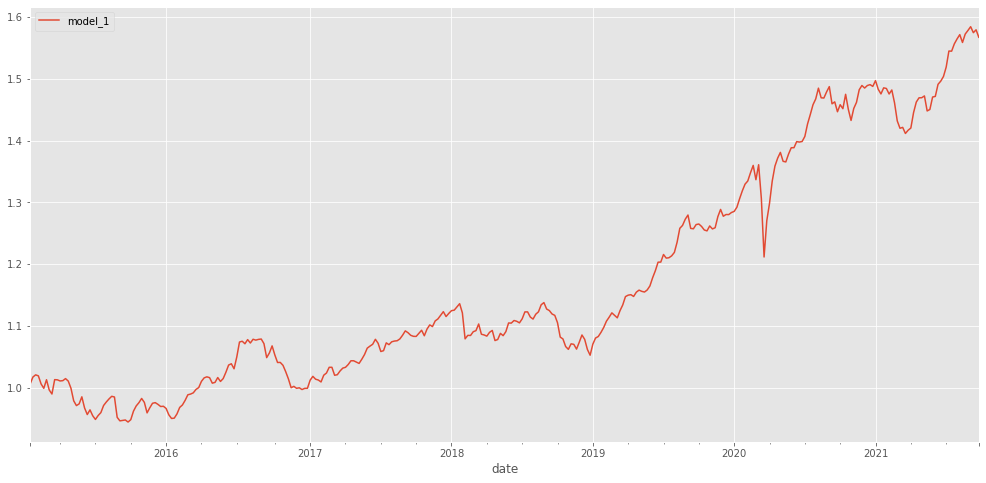

In [101]:
df_result_back = pd.read_csv('../results/backtest/2021_11_15__12_01_44_dpg_ltsm_lr_0.0001_epoch_10000.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

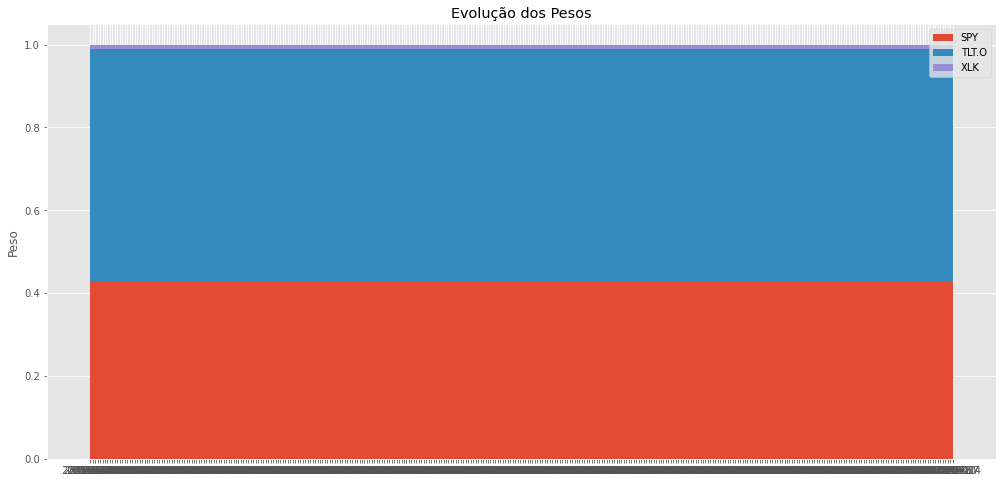

In [102]:
df_w = pd.read_csv('../results/weights/2021_11_15__12_01_44_dpg_ltsm_lr_0.0001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

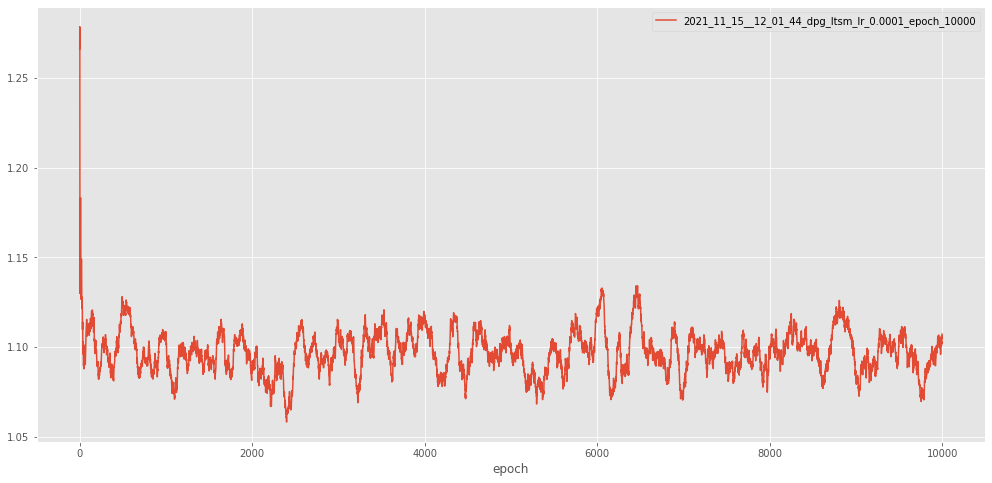

In [105]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_15__12_01_44_dpg_ltsm_lr_0.0001_epoch_10000.csv', index_col=0).rolling(100, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

#### Comparando CNNs com diferentes métricas de risco

Foi usado um ativo livre de risco com média $r_f = 0$.

O cálculo para o sharpe foi:

$$
S_p = \frac{\mu_p - r_f}{\sigma_p}
$$

E para o sortino:

$$
Sr_p = \frac{\mu_p - r_f}{\overline{\sigma_p}}
$$

Onde:

$$
\overline{\sigma_p} = \sqrt{\frac{1}{N}\sum_{i=1}^N min(0, (R_{ip} - r_f))^2}
$$

<AxesSubplot:xlabel='date'>

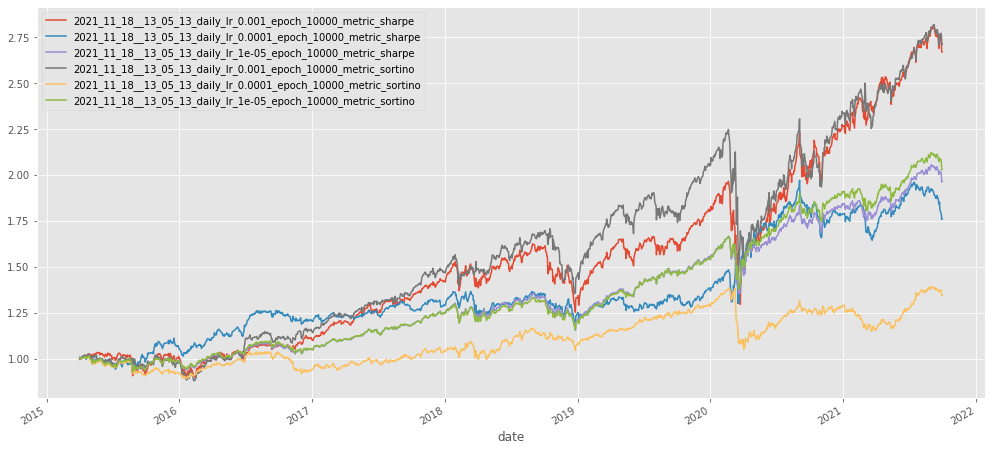

In [43]:
df_result_back = pd.read_csv('../results/backtest/2021_11_18__14_06_51_aggregated_dpg_daily_cnn_rf.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [44]:
df_result_back.columns

Index(['2021_11_18__13_05_13_daily_lr_0.001_epoch_10000_metric_sharpe',
       '2021_11_18__13_05_13_daily_lr_0.0001_epoch_10000_metric_sharpe',
       '2021_11_18__13_05_13_daily_lr_1e-05_epoch_10000_metric_sharpe',
       '2021_11_18__13_05_13_daily_lr_0.001_epoch_10000_metric_sortino',
       '2021_11_18__13_05_13_daily_lr_0.0001_epoch_10000_metric_sortino',
       '2021_11_18__13_05_13_daily_lr_1e-05_epoch_10000_metric_sortino'],
      dtype='object')

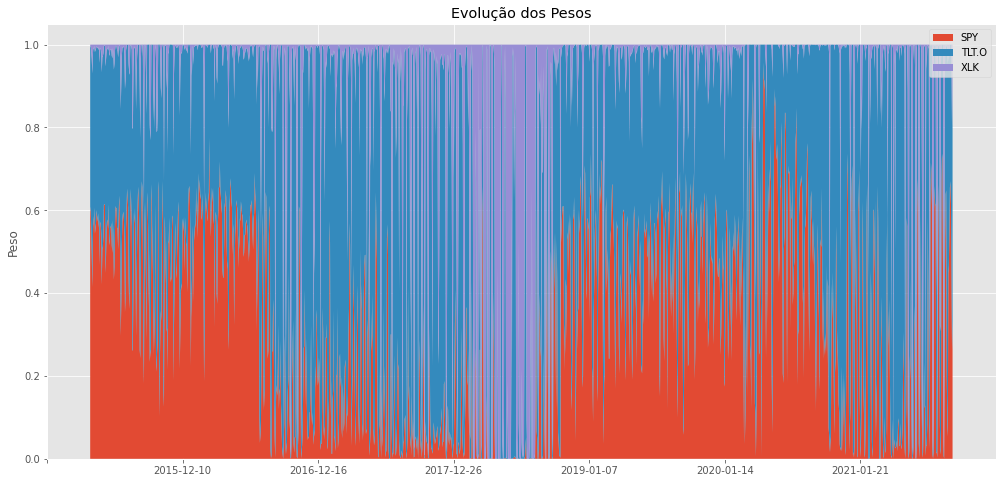

In [71]:
df_w = pd.read_csv('../results/weights/2021_11_18__13_05_13_daily_lr_0.0001_epoch_10000_metric_sortino.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

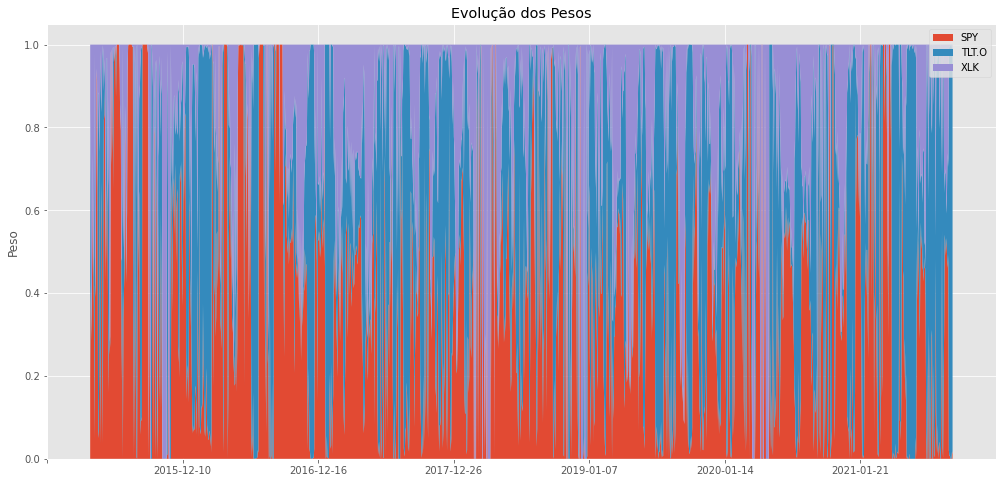

In [75]:
df_w = pd.read_csv('../results/weights/2021_11_18__13_05_13_daily_lr_0.0001_epoch_10000_metric_sharpe.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

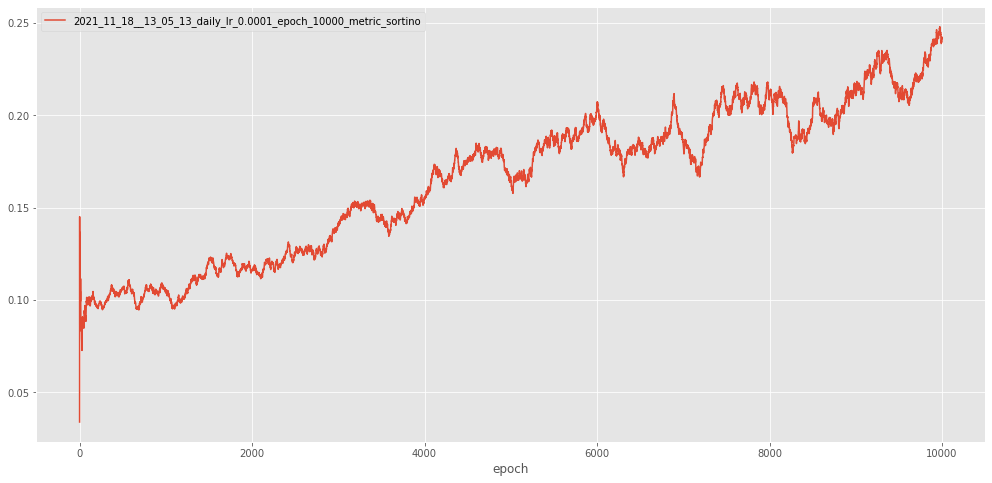

In [78]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__13_05_13_daily_lr_0.0001_epoch_10000_metric_sortino.csv', parse_dates=True, index_col=0).rolling(300, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

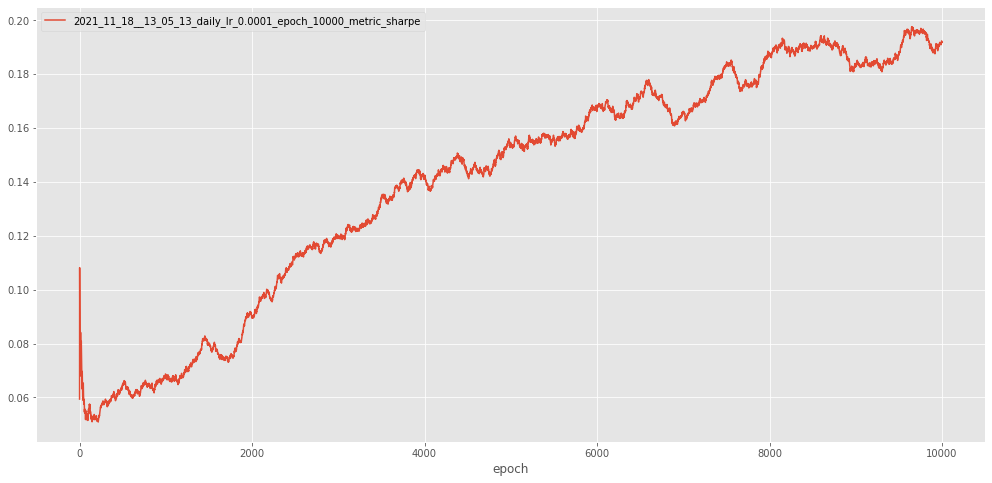

In [81]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__13_05_13_daily_lr_0.0001_epoch_10000_metric_sharpe.csv', parse_dates=True, index_col=0).rolling(300, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

#### Mesmo teste anterior, adicionando dropout

Mesmo teste realizado anteiormente, para comparar as métricas de risco, mas adicionando dropout na rede de convolução agora.

<AxesSubplot:xlabel='date'>

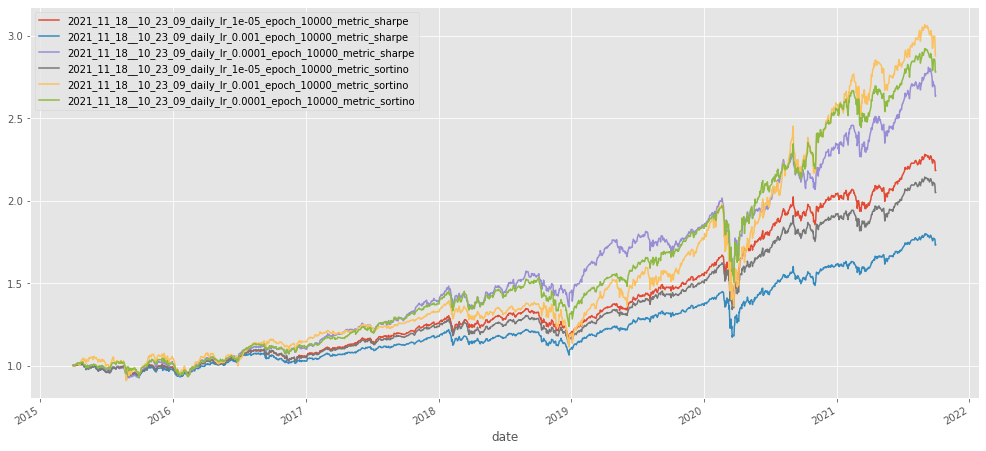

In [21]:
df_result_back = pd.read_csv('../results/backtest/2021_11_18__11_29_10_aggregated_dpg_daily_cnn_dropout_sortino.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [22]:
df_result_back.columns

Index(['2021_11_18__10_23_09_daily_lr_1e-05_epoch_10000_metric_sharpe',
       '2021_11_18__10_23_09_daily_lr_0.001_epoch_10000_metric_sharpe',
       '2021_11_18__10_23_09_daily_lr_0.0001_epoch_10000_metric_sharpe',
       '2021_11_18__10_23_09_daily_lr_1e-05_epoch_10000_metric_sortino',
       '2021_11_18__10_23_09_daily_lr_0.001_epoch_10000_metric_sortino',
       '2021_11_18__10_23_09_daily_lr_0.0001_epoch_10000_metric_sortino'],
      dtype='object')

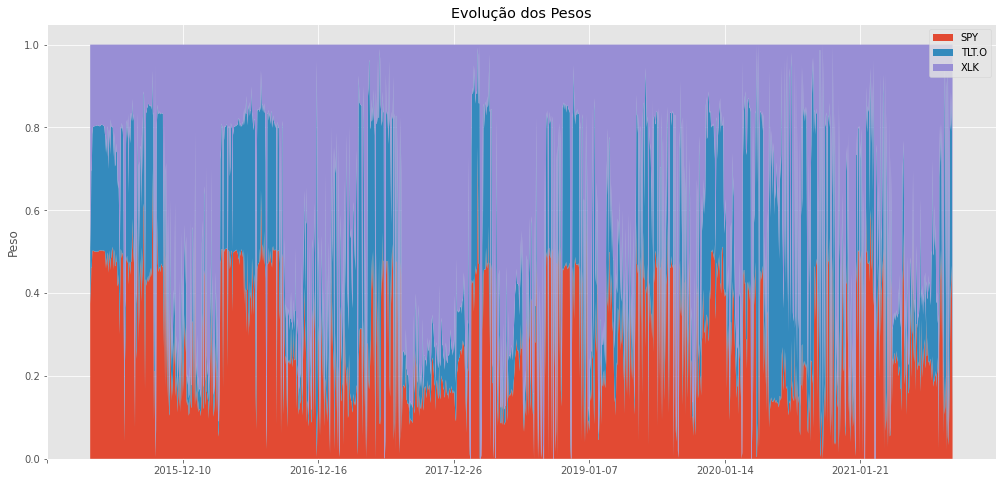

In [23]:
df_w = pd.read_csv('../results/weights/2021_11_18__10_23_09_daily_lr_0.0001_epoch_10000_metric_sharpe.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

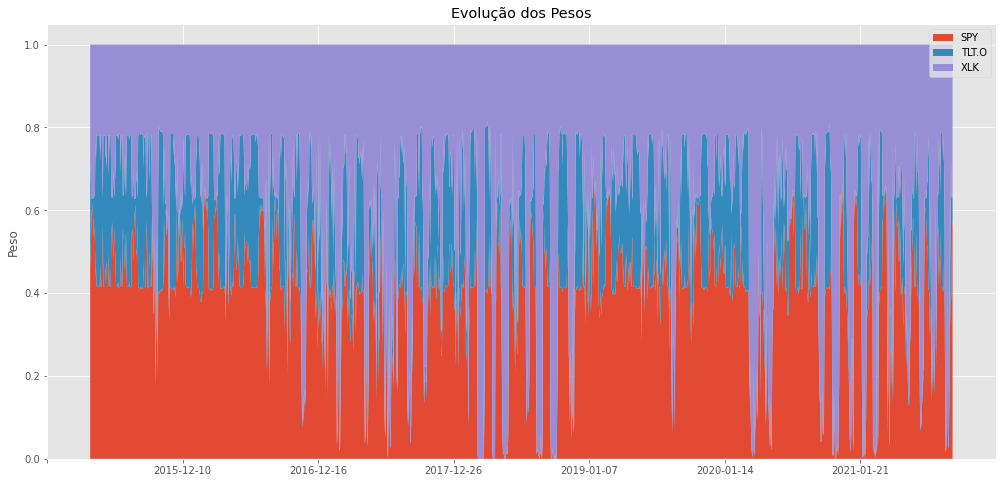

In [83]:
df_w = pd.read_csv('../results/weights/2021_11_18__10_23_09_daily_lr_0.0001_epoch_10000_metric_sortino.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

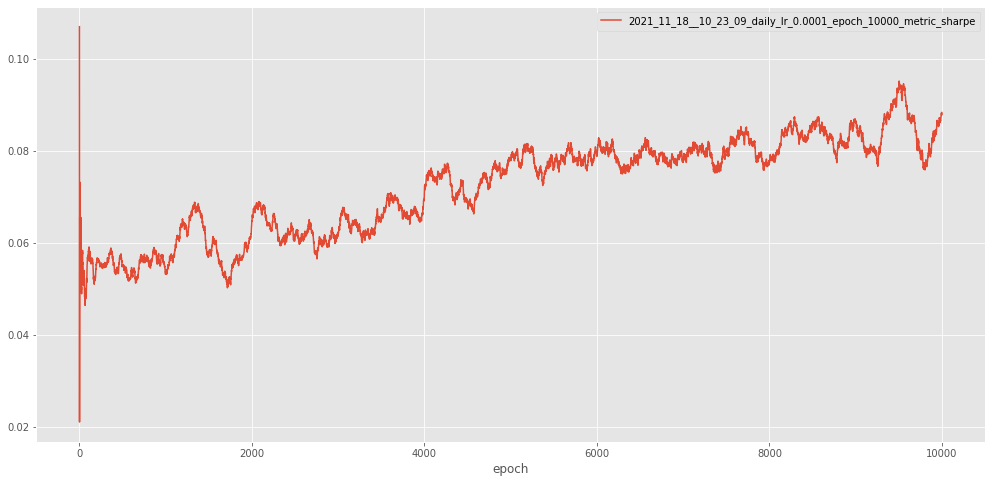

In [39]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__10_23_09_daily_lr_0.0001_epoch_10000_metric_sharpe.csv', parse_dates=True, index_col=0).rolling(300, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

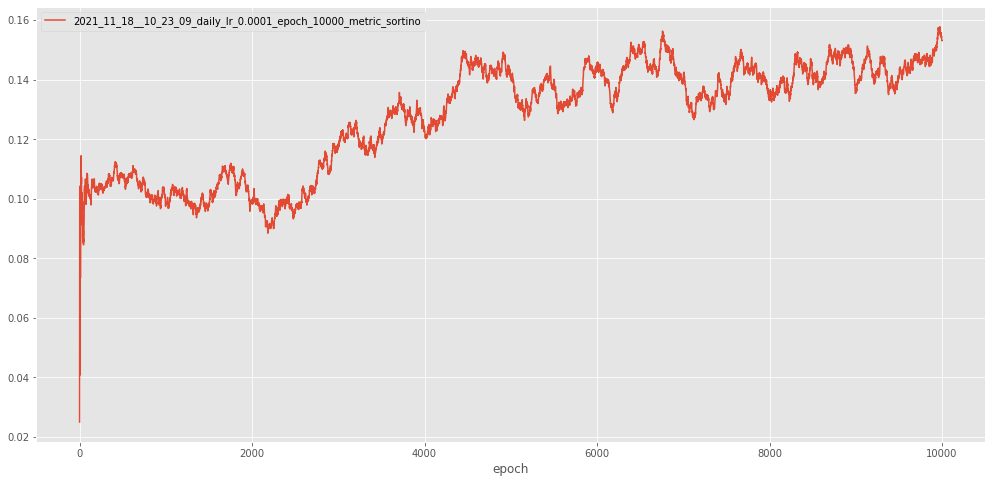

In [85]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__10_23_09_daily_lr_0.0001_epoch_10000_metric_sortino.csv', parse_dates=True, index_col=0).rolling(300, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

#### Teste comparando métricas de risco usando SPY como ativo livre de risco

<AxesSubplot:xlabel='date'>

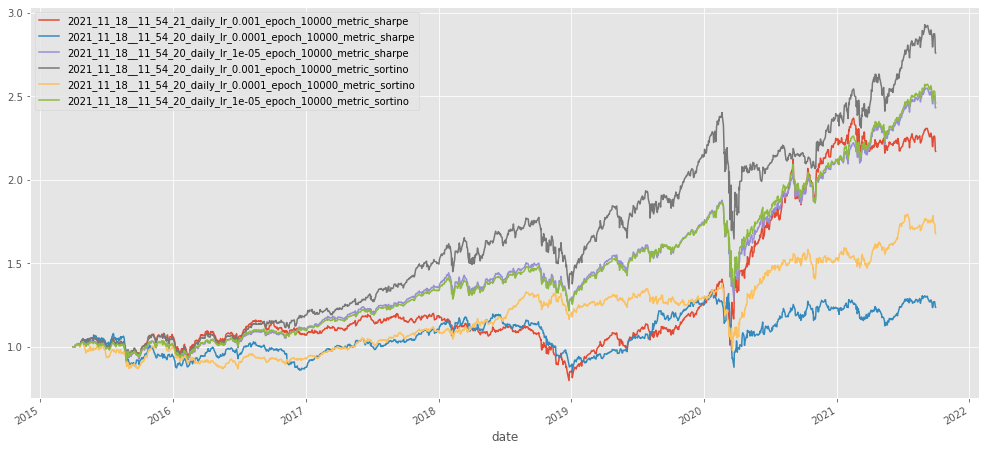

In [86]:
df_result_back = pd.read_csv('../results/backtest/2021_11_18__12_55_55_aggregated_dpg_daily_cnn_spy_rf.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [87]:
df_result_back.columns

Index(['2021_11_18__11_54_21_daily_lr_0.001_epoch_10000_metric_sharpe',
       '2021_11_18__11_54_20_daily_lr_0.0001_epoch_10000_metric_sharpe',
       '2021_11_18__11_54_20_daily_lr_1e-05_epoch_10000_metric_sharpe',
       '2021_11_18__11_54_20_daily_lr_0.001_epoch_10000_metric_sortino',
       '2021_11_18__11_54_20_daily_lr_0.0001_epoch_10000_metric_sortino',
       '2021_11_18__11_54_20_daily_lr_1e-05_epoch_10000_metric_sortino'],
      dtype='object')

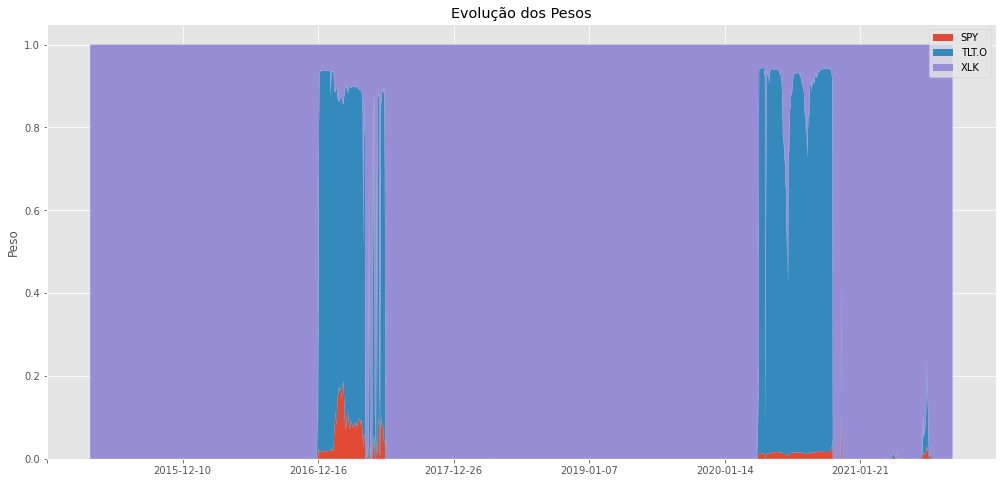

In [20]:
df_w = pd.read_csv('../results/weights/2021_11_18__11_54_20_daily_lr_0.001_epoch_10000_metric_sortino.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

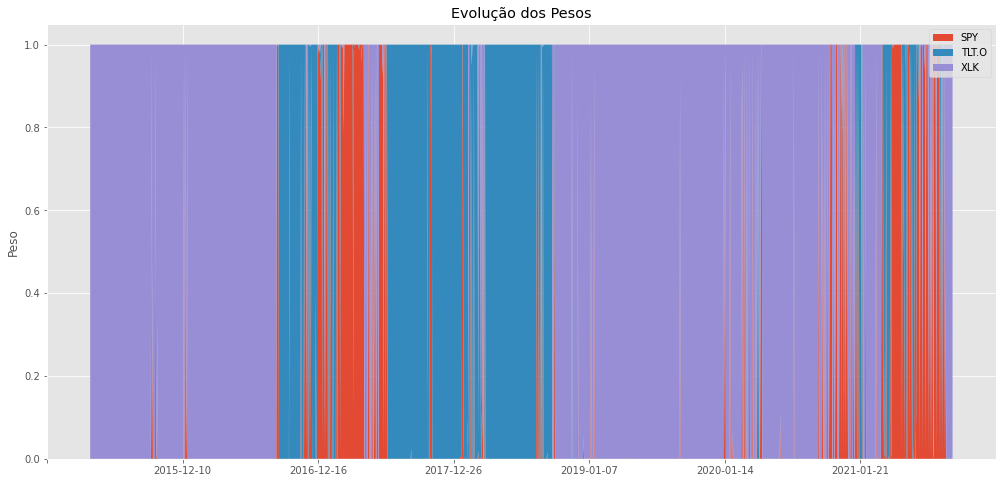

In [96]:
df_w = pd.read_csv('../results/weights/2021_11_18__11_54_21_daily_lr_0.001_epoch_10000_metric_sharpe.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

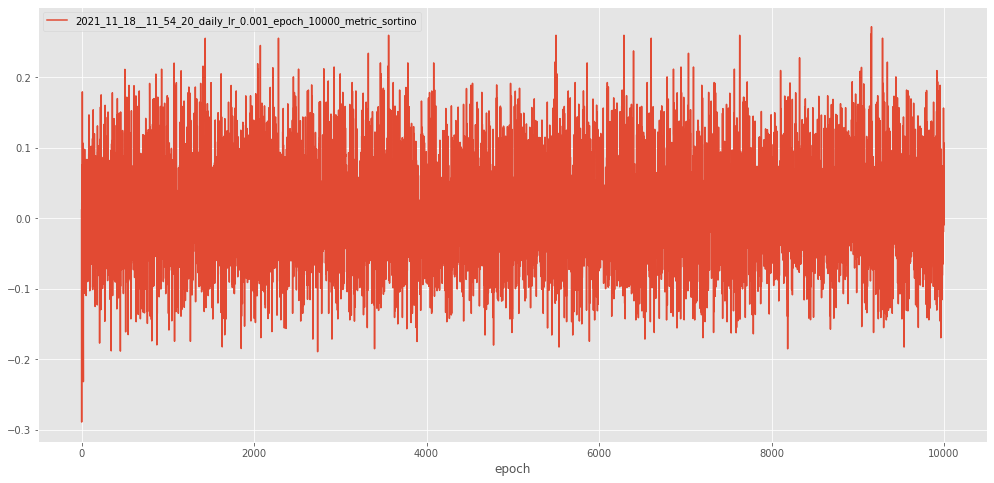

In [21]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__11_54_20_daily_lr_0.001_epoch_10000_metric_sortino.csv', parse_dates=True, index_col=0).rolling(1, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

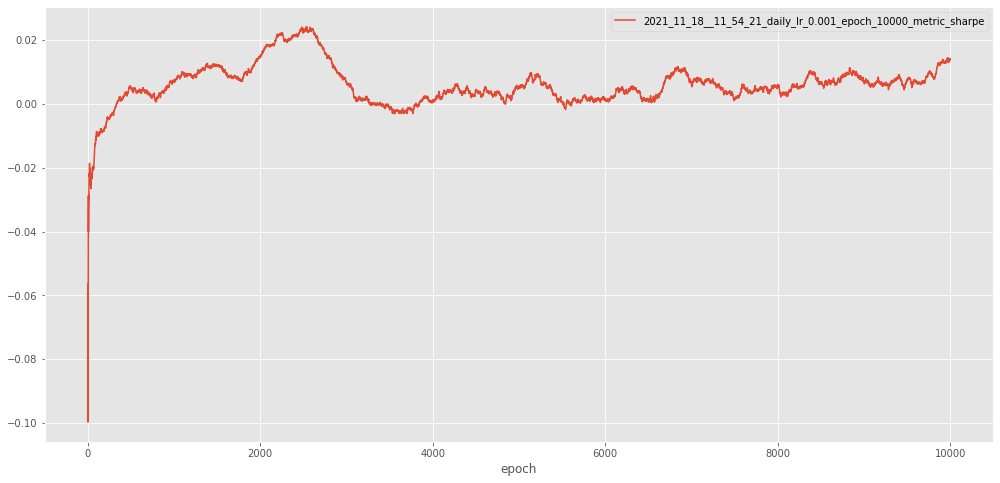

In [132]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__11_54_21_daily_lr_0.001_epoch_10000_metric_sharpe.csv', parse_dates=True, index_col=0).rolling(300, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

#### Teste com configurações anteriores, mas com dropout

<AxesSubplot:xlabel='date'>

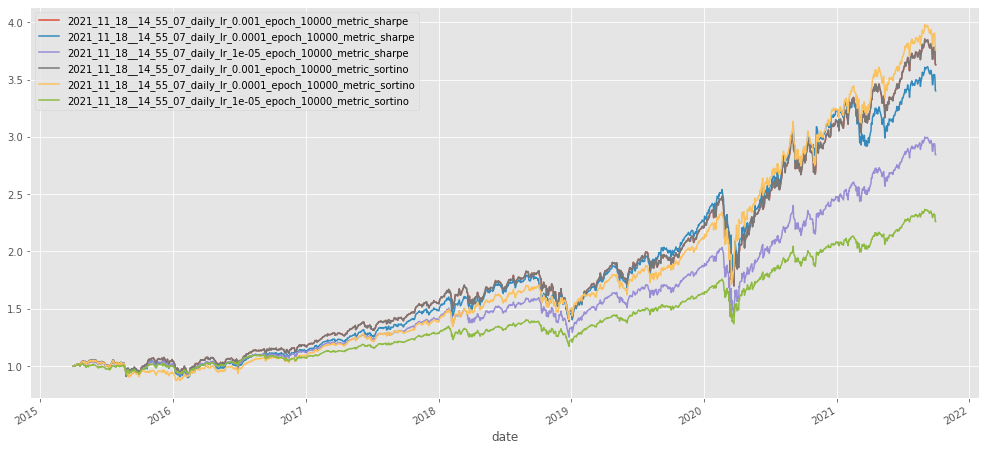

In [50]:
df_result_back = pd.read_csv('../results/backtest/2021_11_18__16_01_33_aggregated_dpg_daily_cnn_spy_rf.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [51]:
df_result_back.columns

Index(['2021_11_18__14_55_07_daily_lr_0.001_epoch_10000_metric_sharpe',
       '2021_11_18__14_55_07_daily_lr_0.0001_epoch_10000_metric_sharpe',
       '2021_11_18__14_55_07_daily_lr_1e-05_epoch_10000_metric_sharpe',
       '2021_11_18__14_55_07_daily_lr_0.001_epoch_10000_metric_sortino',
       '2021_11_18__14_55_07_daily_lr_0.0001_epoch_10000_metric_sortino',
       '2021_11_18__14_55_07_daily_lr_1e-05_epoch_10000_metric_sortino'],
      dtype='object')

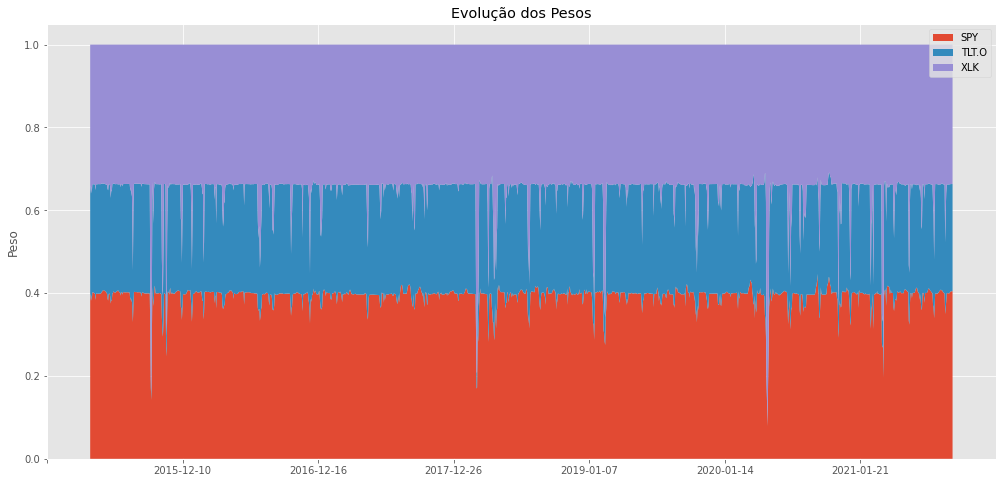

In [14]:
df_w = pd.read_csv('../results/weights/2021_11_18__14_55_07_daily_lr_1e-05_epoch_10000_metric_sortino.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

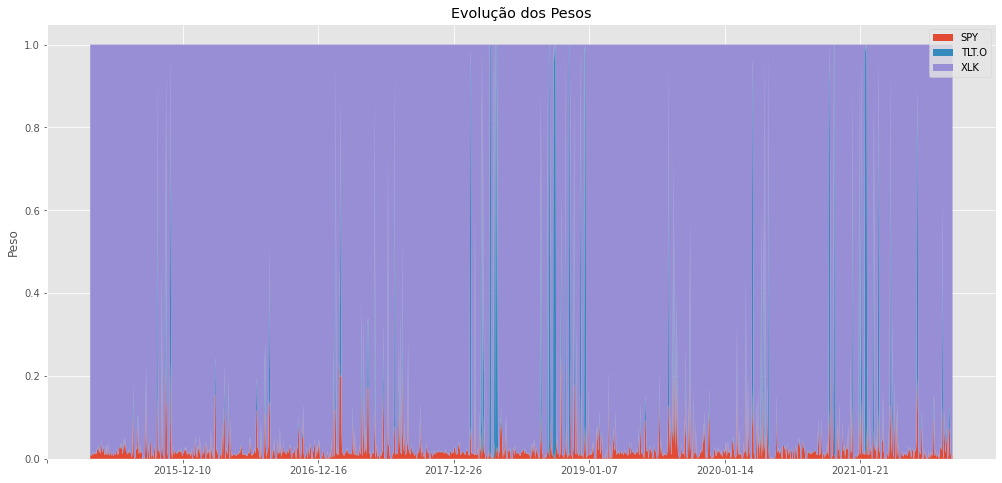

In [99]:
df_w = pd.read_csv('../results/weights/2021_11_18__14_55_07_daily_lr_0.0001_epoch_10000_metric_sharpe.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

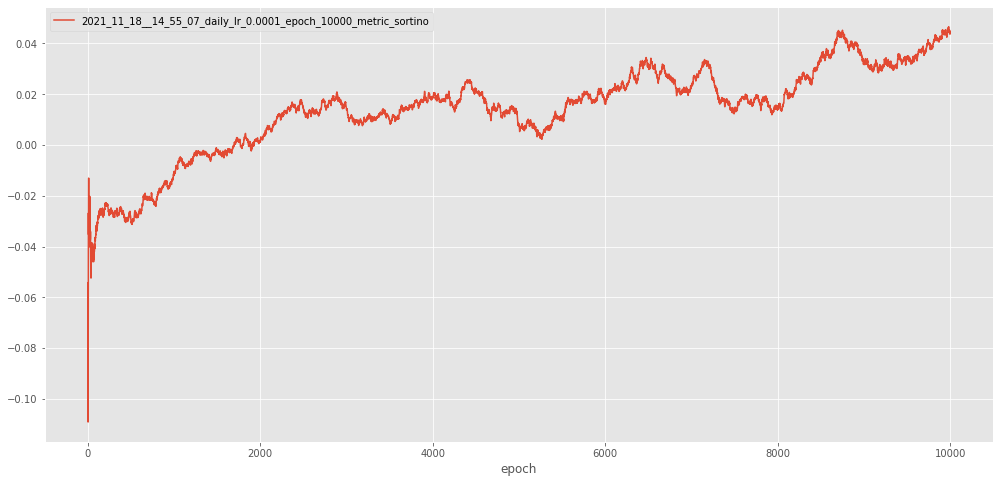

In [100]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__14_55_07_daily_lr_0.0001_epoch_10000_metric_sortino.csv', parse_dates=True, index_col=0).rolling(300, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

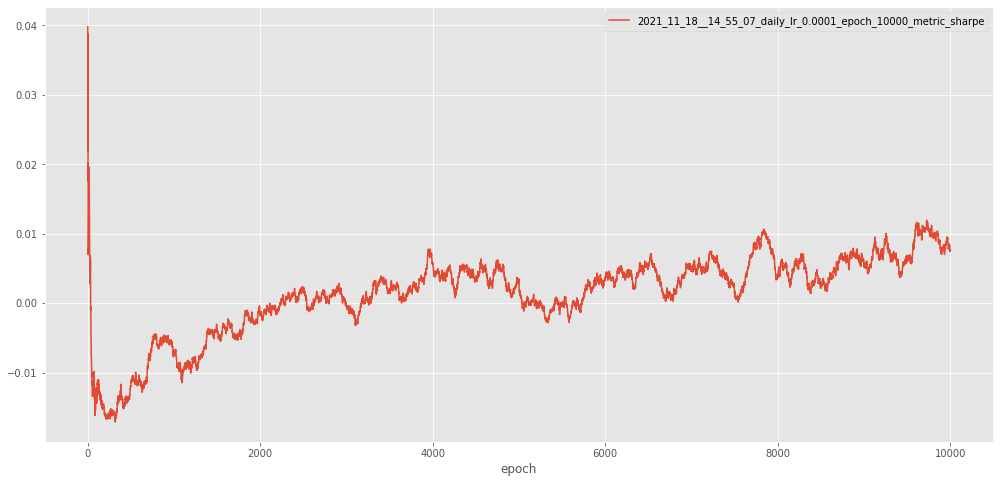

In [101]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__14_55_07_daily_lr_0.0001_epoch_10000_metric_sharpe.csv', parse_dates=True, index_col=0).rolling(300, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

#### Voltando a treinar com CNN sem dropout e rf default, com mais épocas

<AxesSubplot:xlabel='date'>

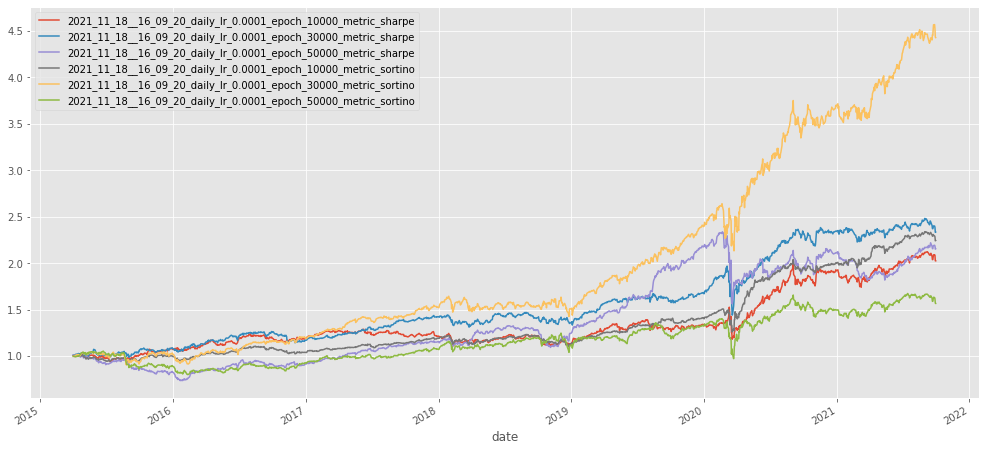

In [58]:
df_result_back = pd.read_csv('../results/backtest/2021_11_18__19_56_04_aggregated_dpg_daily_cnn_rf_epochs.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [59]:
df_result_back.columns

Index(['2021_11_18__16_09_20_daily_lr_0.0001_epoch_10000_metric_sharpe',
       '2021_11_18__16_09_20_daily_lr_0.0001_epoch_30000_metric_sharpe',
       '2021_11_18__16_09_20_daily_lr_0.0001_epoch_50000_metric_sharpe',
       '2021_11_18__16_09_20_daily_lr_0.0001_epoch_10000_metric_sortino',
       '2021_11_18__16_09_20_daily_lr_0.0001_epoch_30000_metric_sortino',
       '2021_11_18__16_09_20_daily_lr_0.0001_epoch_50000_metric_sortino'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

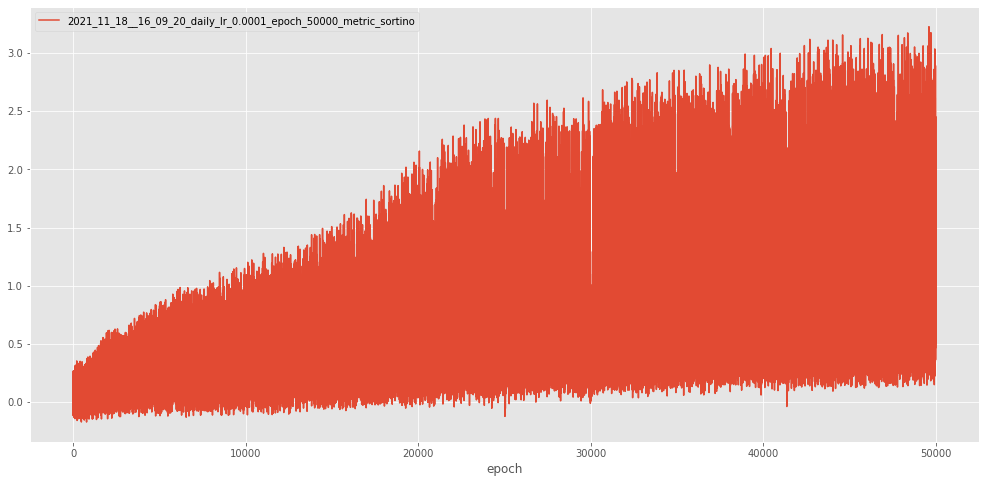

In [128]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__16_09_20_daily_lr_0.0001_epoch_50000_metric_sortino.csv', parse_dates=True, index_col=0).rolling(1, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

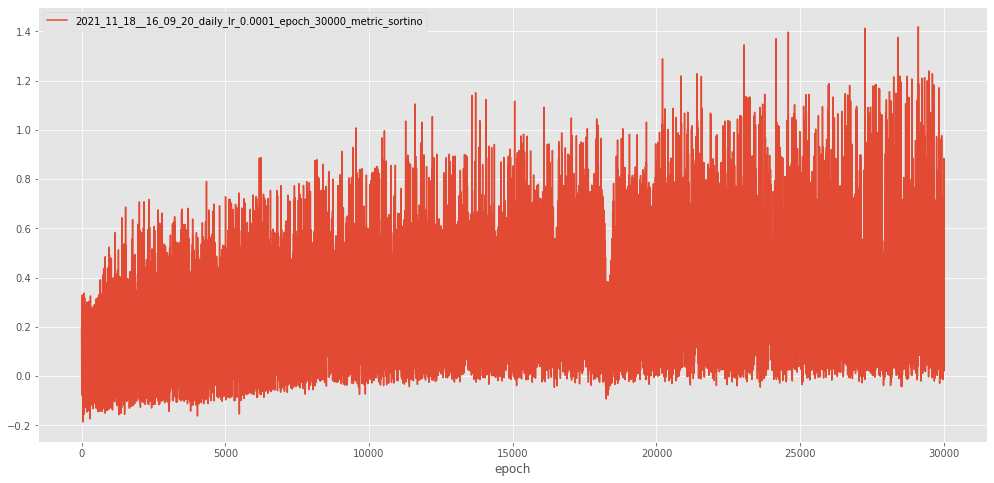

In [123]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__16_09_20_daily_lr_0.0001_epoch_30000_metric_sortino.csv', parse_dates=True, index_col=0).rolling(1, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

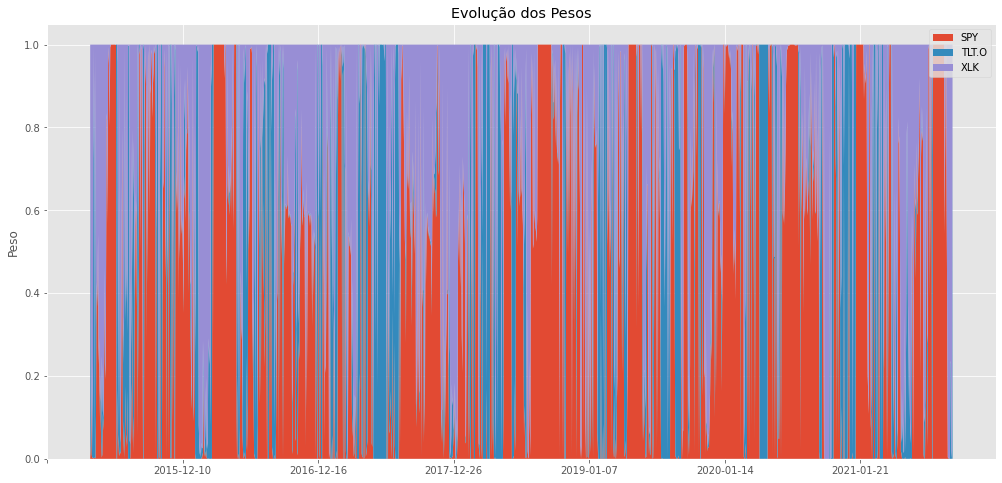

In [63]:
df_w = pd.read_csv('../results/weights/2021_11_18__16_09_20_daily_lr_0.0001_epoch_50000_metric_sortino.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

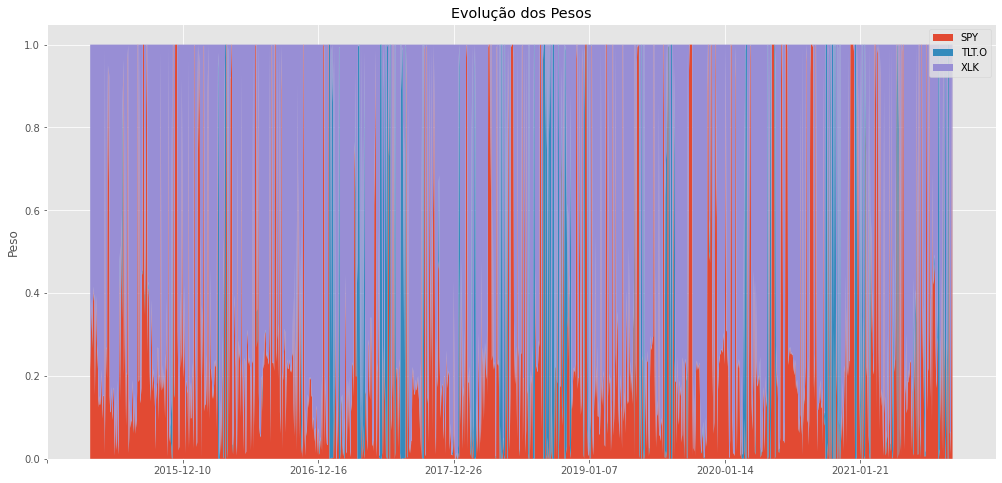

In [64]:
df_w = pd.read_csv('../results/weights/2021_11_18__16_09_20_daily_lr_0.0001_epoch_30000_metric_sortino.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

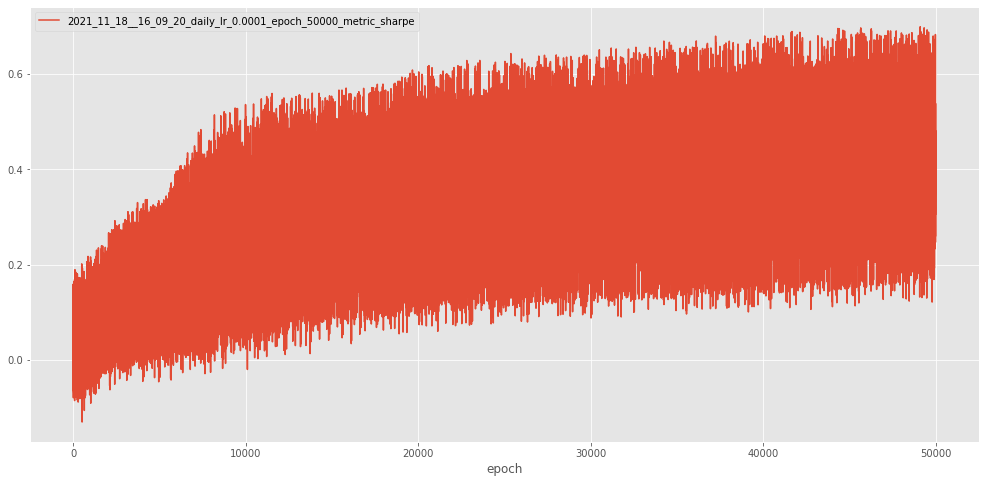

In [129]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__16_09_20_daily_lr_0.0001_epoch_50000_metric_sharpe.csv', parse_dates=True, index_col=0).rolling(1, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

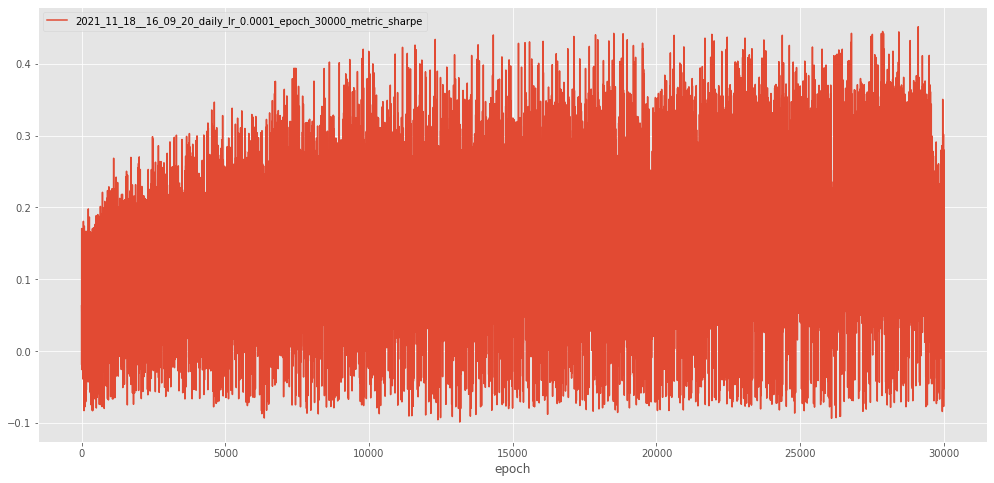

In [130]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_18__16_09_20_daily_lr_0.0001_epoch_30000_metric_sharpe.csv', parse_dates=True, index_col=0).rolling(1, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

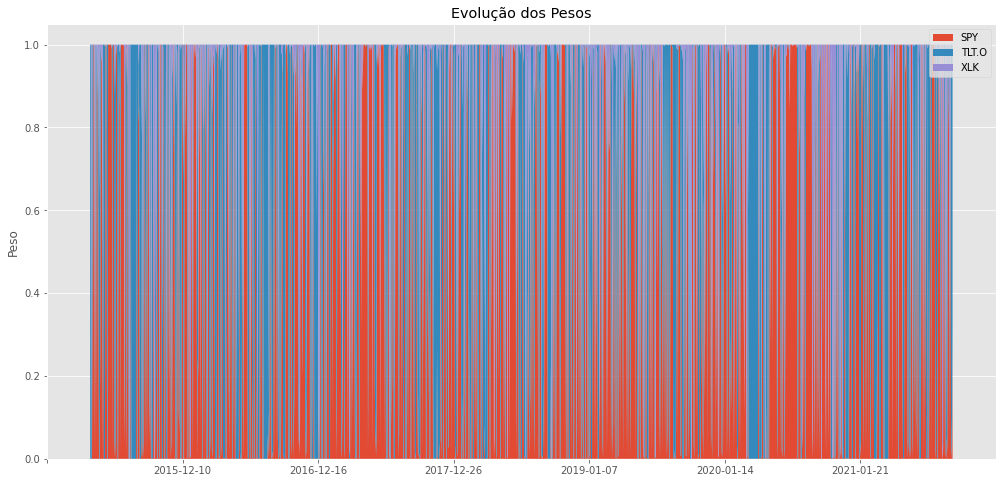

In [67]:
df_w = pd.read_csv('../results/weights/2021_11_18__16_09_20_daily_lr_0.0001_epoch_50000_metric_sharpe.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

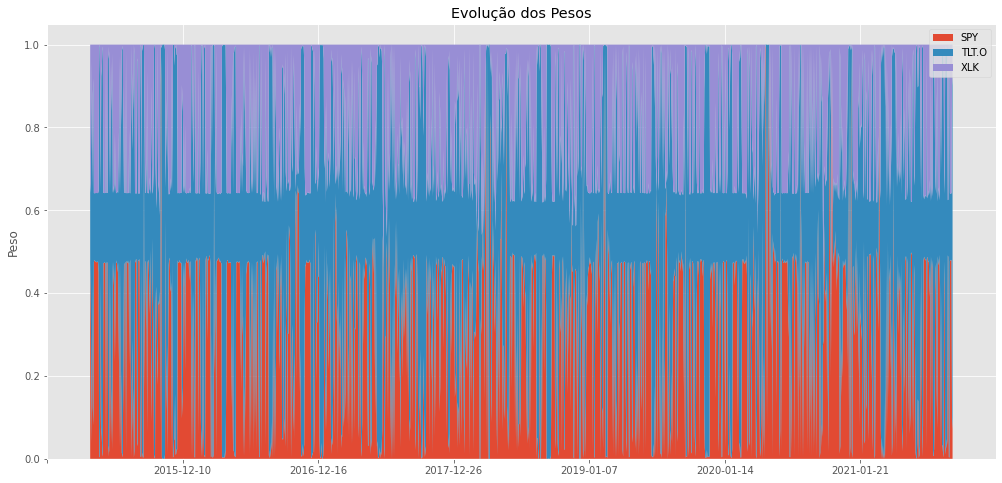

In [68]:
df_w = pd.read_csv('../results/weights/2021_11_18__16_09_20_daily_lr_0.0001_epoch_30000_metric_sharpe.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

#### Inserindo informação de tendência nas features (média móvel dos retornos em uma janela de 66 dias pra trás)

<AxesSubplot:xlabel='date'>

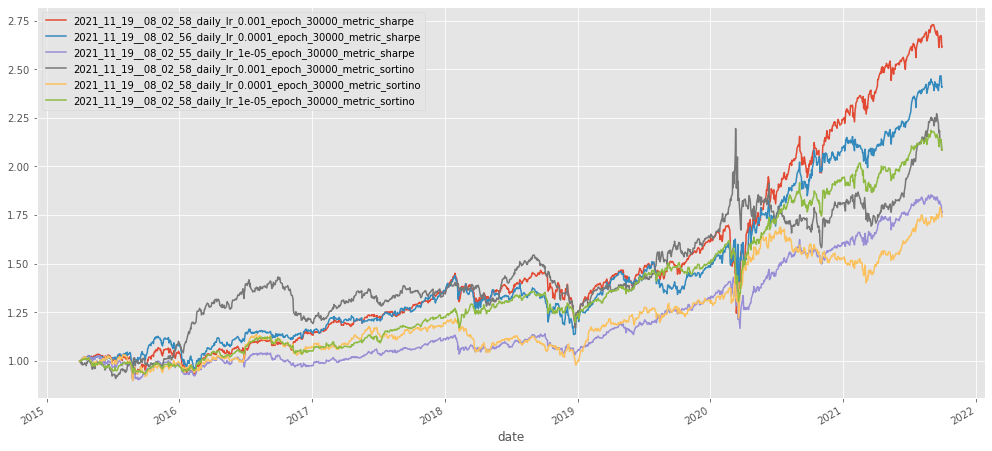

In [2]:
df_result_back = pd.read_csv('../results/backtest/2021_11_19__11_09_06_aggregated_dpg_daily_cnn_rf_epochs.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [3]:
df_result_back.columns

Index(['2021_11_19__08_02_58_daily_lr_0.001_epoch_30000_metric_sharpe',
       '2021_11_19__08_02_56_daily_lr_0.0001_epoch_30000_metric_sharpe',
       '2021_11_19__08_02_55_daily_lr_1e-05_epoch_30000_metric_sharpe',
       '2021_11_19__08_02_58_daily_lr_0.001_epoch_30000_metric_sortino',
       '2021_11_19__08_02_58_daily_lr_0.0001_epoch_30000_metric_sortino',
       '2021_11_19__08_02_58_daily_lr_1e-05_epoch_30000_metric_sortino'],
      dtype='object')

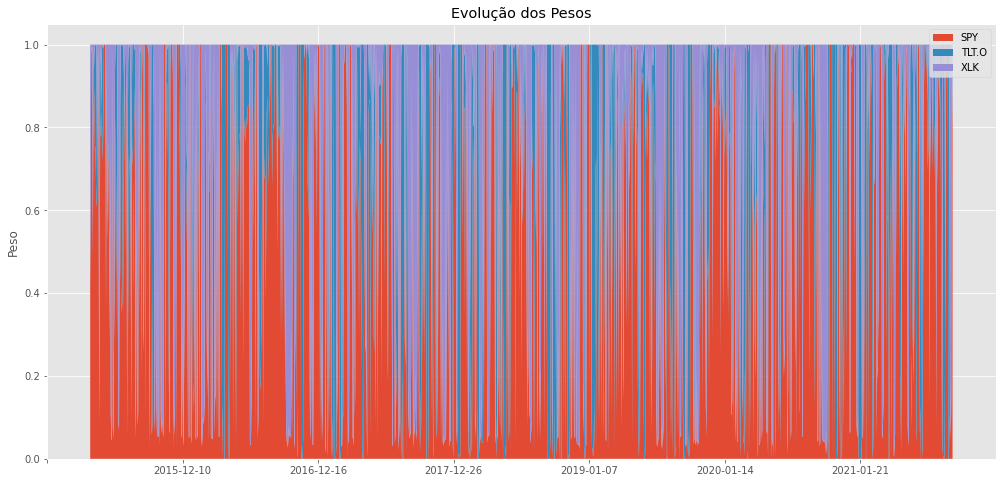

In [16]:
df_w = pd.read_csv('../results/weights/2021_11_19__08_02_56_daily_lr_0.0001_epoch_30000_metric_sharpe.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

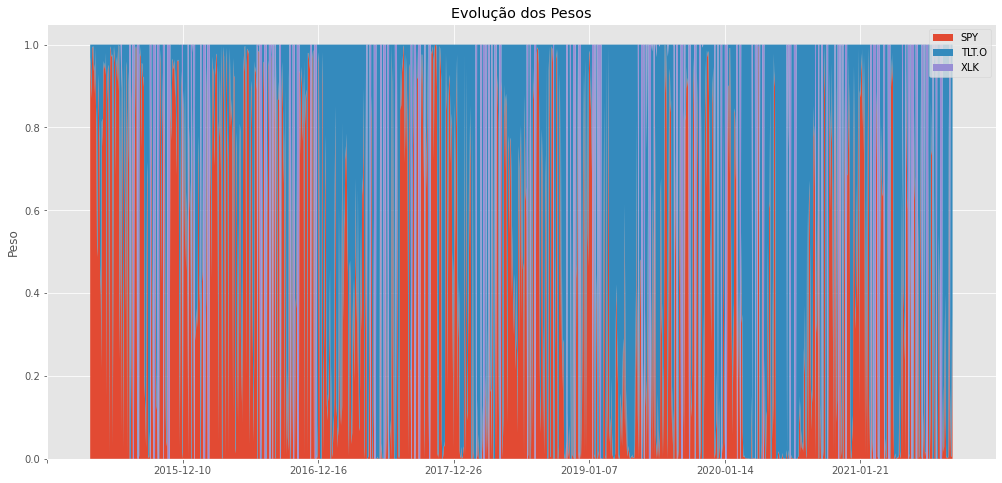

In [17]:
df_w = pd.read_csv('../results/weights/2021_11_19__08_02_58_daily_lr_0.0001_epoch_30000_metric_sortino.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

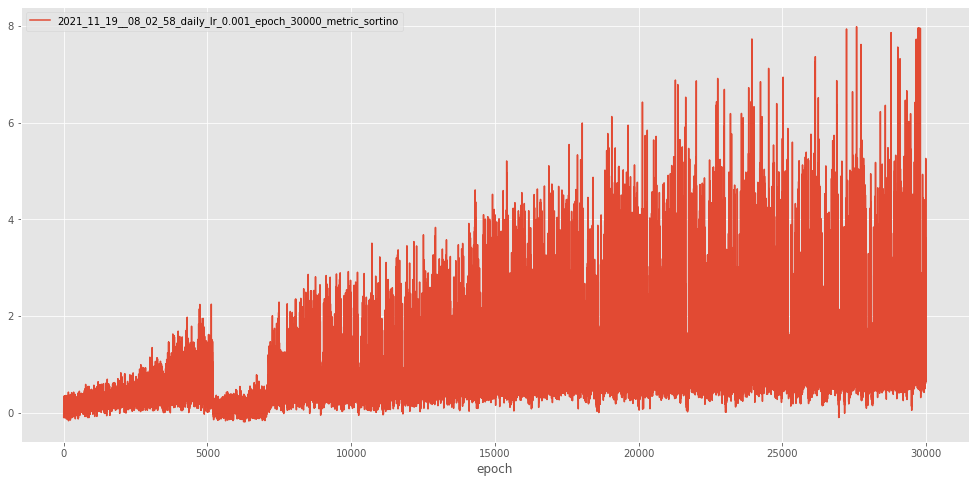

In [13]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_19__08_02_58_daily_lr_0.001_epoch_30000_metric_sortino.csv', parse_dates=True, index_col=0).rolling(1, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

#### Usando SPY como ativo livre de risco e incluindo informaçõesdetendência. Treinando por mais épocas, também.

<AxesSubplot:xlabel='date'>

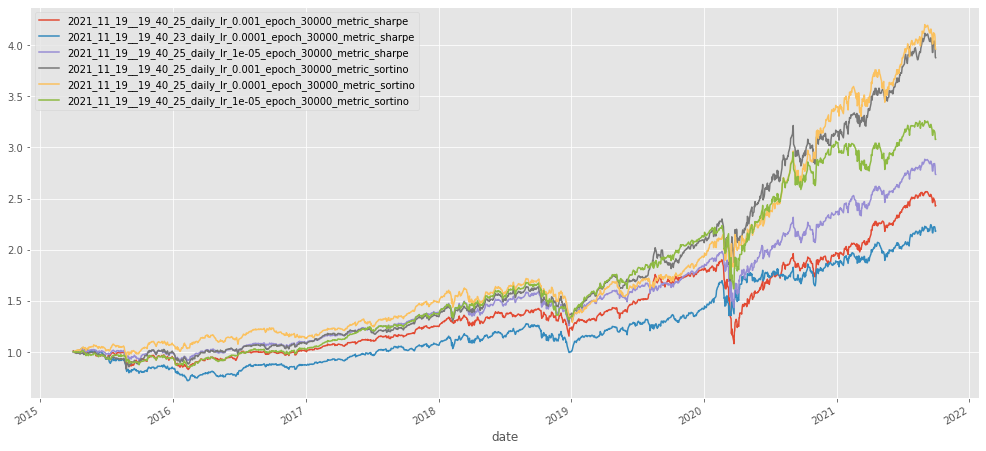

In [2]:
df_result_back = pd.read_csv('../results/backtest/2021_11_19__22_49_03_aggregated_dpg_daily_cnn__SPY_rf_tendencia.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [3]:
df_result_back.columns

Index(['2021_11_19__19_40_25_daily_lr_0.001_epoch_30000_metric_sharpe',
       '2021_11_19__19_40_23_daily_lr_0.0001_epoch_30000_metric_sharpe',
       '2021_11_19__19_40_25_daily_lr_1e-05_epoch_30000_metric_sharpe',
       '2021_11_19__19_40_25_daily_lr_0.001_epoch_30000_metric_sortino',
       '2021_11_19__19_40_25_daily_lr_0.0001_epoch_30000_metric_sortino',
       '2021_11_19__19_40_25_daily_lr_1e-05_epoch_30000_metric_sortino'],
      dtype='object')

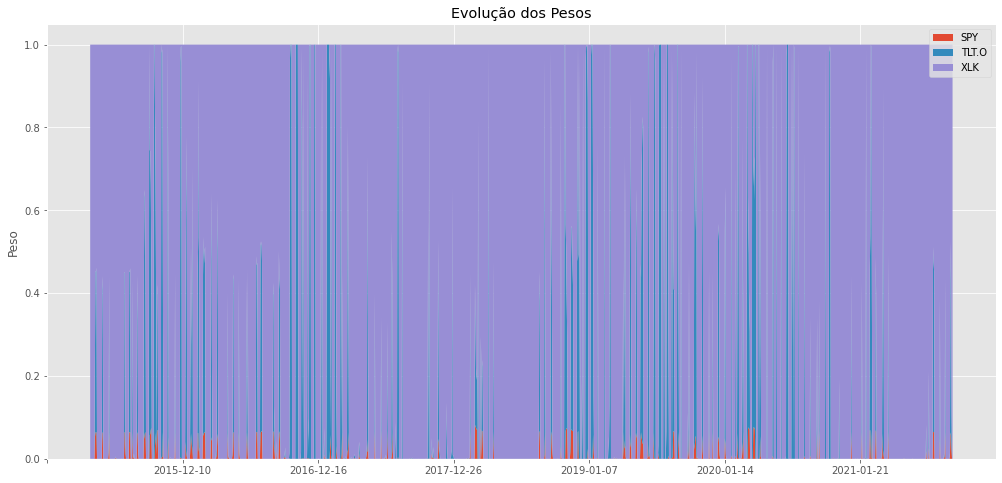

In [7]:
df_w = pd.read_csv('../results/weights/2021_11_19__19_40_25_daily_lr_0.0001_epoch_30000_metric_sortino.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

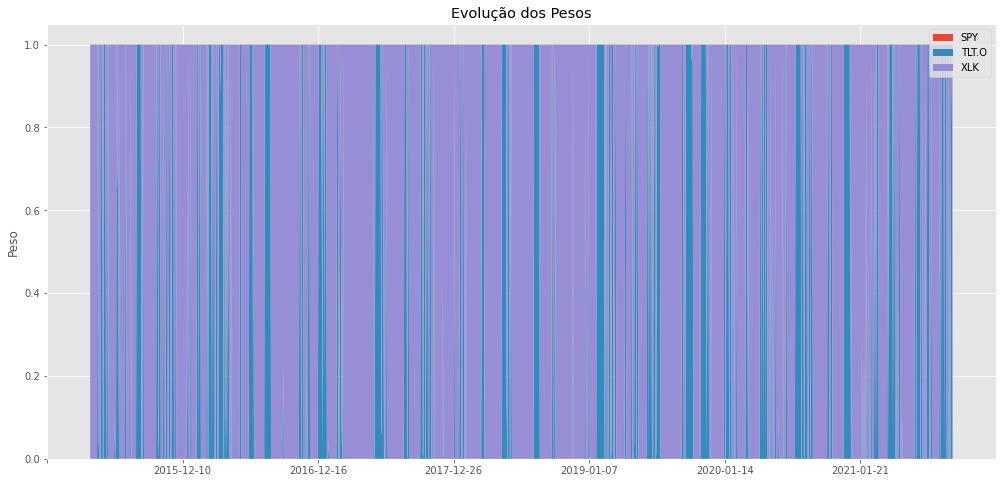

In [8]:
df_w = pd.read_csv('../results/weights/2021_11_19__19_40_23_daily_lr_0.0001_epoch_30000_metric_sharpe.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

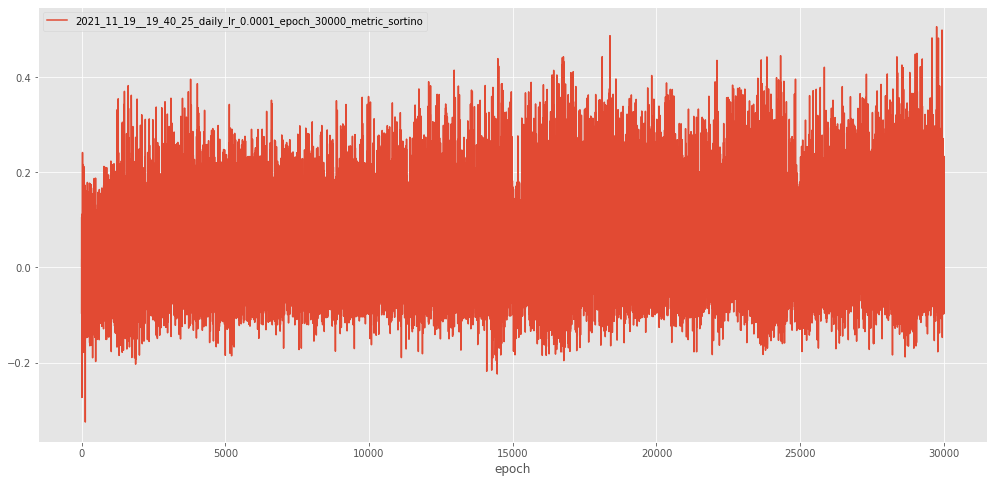

In [17]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_19__19_40_25_daily_lr_0.0001_epoch_30000_metric_sortino.csv', parse_dates=True, index_col=0).rolling(1, min_periods=1).mean()
df_loss.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

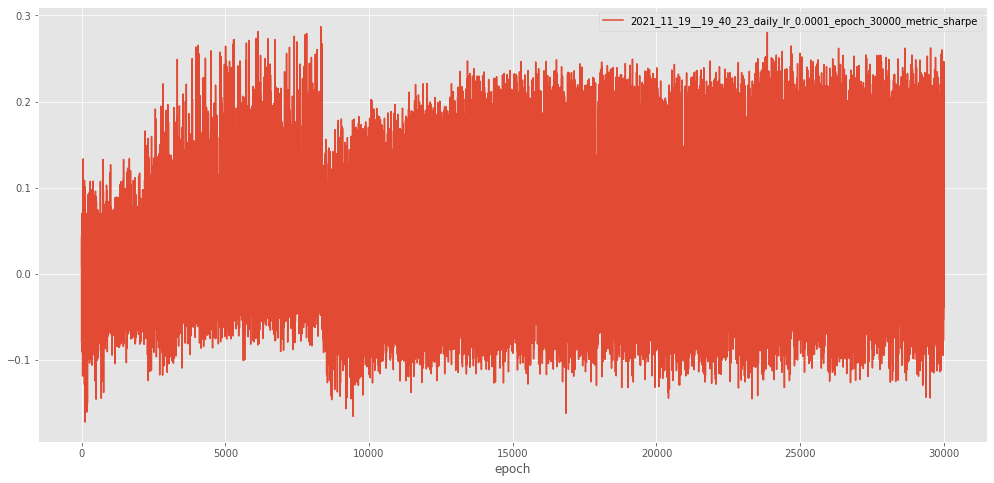

In [10]:
df_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_19__19_40_23_daily_lr_0.0001_epoch_30000_metric_sharpe.csv', parse_dates=True, index_col=0).rolling(1, min_periods=1).mean()
df_loss.plot(figsize=(17,8))